# Project Description:
In this project, we set out to evaluate the market risk of three key financial assets with very different risk profiles: the **S&P 500, Bitcoin,** and the **1-Year U.S. Treasury Bond**. 

To do this, we utilized different Value at Risk (VaR) metrics. We used **Historical VaR, Parametric VaR, MonteCarlo VaR and Expected Shortfall (ES) / Conditional VaR**.

Our analysis compreends a decade, from May 1, 2014, to May 1, 2024, which helps to understand both typical market conditions and periods of extreme market stress ( Covid ).

--------------------------------------------------------------------------------------

# Dataset Description

The final dataset has 52 columns, which include a variety of financial and macroeconomic variables from May 1, 2014, to May 1, 2024.

It primarily focuses on three main financial assets: the S&P 500, Bitcoin, and the 1-Year U.S. Treasury Bond. Alongside these, it also incorporates several macroeconomic indicators and features to improve our model. Here’s a detailed look at what each column represents:

- **Asset Data**: Provides the historical performance and returns of the S&P 500, Bitcoin, and 1-Year U.S. Treasury Bond.

- **Macroeconomic Indicators**: Offer insights into the broader economic environment affecting asset prices and returns. We used them for correlation and to create the interaction terms, that we decided to drop off, due to overestimation results. They still play an important role. We can use them separately with VaR calculations to estimate the market risk, as they still offer valuable insights.

- **Features (Used in VaR Calculation)**: Used for MC VaR calculations to predict future price paths and assess market risk. The log returns will have 95% weight for the calculations and the other features 5%, this is to avoid overestimation of the VaR threshold.

- **Interaction Features**: They capture the combined effects of asset returns and macroeconomic factors. They won’t be used in our final models, because even after scaling and normalizing appropriately, they still made our model overestimate our VaR.

# Columns Description

## Baseline Data

### Asset Data:
1. **SP500_Price**: The closing price of the S&P 500 index.

2. **BTC_Price**: The closing price of Bitcoin.

3. **TMUBMUSD01Y_Price**: The closing price of the 1-Year U.S. Treasury Bond.

### Macroeconomic Indicators:
4. **UNRATE**: Unemployment Rate.

5. **A191RL1Q225SBEA**: Real GDP.

6. **CPIAUCSL**: Consumer Price Index.

7. **VIXCLS**: Volatility Index (VIX).

8. **DGS10**: 10-Year Treasury Yield.

9. **FEDFUNDS**: Federal Funds Rate.

10. **BAMLC0A4CBBB**: BBB Credit Spread.

## Created Data - Financial Transformations on Baseline Data

### Additional Features used for Data Visualizations and Statistics:
11. **SP500_Return**: The daily percentage change in the closing price of the S&P 500.

12. **BTC_Return**: The daily percentage change in the closing price of Bitcoin.

13. **TMUBMUSD01Y_Return**: The daily percentage change in the closing price of the 1-Year U.S. Treasury Bond.

### Features (Used in VaR Calculation):
14. **SP500_Log_Return**: Log return of S&P 500 prices.

15. **BTC_Log_Return**: Log return of Bitcoin prices.

16. **TMUBMUSD01Y_Log_Return**: Log return of 1-Year Treasury Bond prices.

17. **SP500_Lagged_Return**: Previous day’s return of S&P 500.

18. **BTC_Lagged_Return**: Previous day’s return of Bitcoin.

19. **TMUBMUSD01Y_Lagged_Return**: Previous day’s return of 1-Year Treasury Bond.

20. **SP500_Rolling_Mean**: 21-day rolling mean of S&P 500 log returns.

21. **SP500_Rolling_Std**: 21-day rolling standard deviation of S&P 500 log returns.

22. **BTC_Rolling_Mean**: 21-day rolling mean of Bitcoin log returns.

23. **BTC_Rolling_Std**: 21-day rolling standard deviation of Bitcoin log returns.

24. **TMUBMUSD01Y_Rolling_Mean**: 21-day rolling mean of 1-Year Treasury Bond log returns.

25. **TMUBMUSD01Y_Rolling_Std**: 21-day rolling standard deviation of 1-Year Treasury Bond log returns.

26. **SP500_EMA**: 21-day exponential moving average of S&P 500 log returns.

27. **BTC_EMA**: 21-day exponential moving average of Bitcoin log returns.

28. **TMUBMUSD01Y_EMA**: 21-day exponential moving average of 1-Year Treasury Bond log returns.

### Interaction Features:
29. **SP500_BTC_Interaction**: Interaction term between S&P 500 Log Returns and Bitcoin Log Returns.

30. **SP500_Treasury_Interaction**: Interaction term between S&P 500 Log Returns and 1-Year Treasury Log Returns.

31. **BTC_Treasury_Interaction**: Interaction term between Bitcoin Log Returns and 1-Year Treasury Log Returns.

32. **SP500_UNRATE_Interaction**: Interaction term between S&P 500 Log Returns and Unemployment Rate.

33. **SP500_GDP_Interaction**: Interaction term between S&P 500 Log Returns and Real GDP.

34. **SP500_CPI_Interaction**: Interaction term between S&P 500 Log Returns and Consumer Price Index.

35. **SP500_VIX_Interaction**: Interaction term between S&P 500 Log Returns and Volatility Index.

36. **SP500_Treasury_Yield_Interaction**: Interaction term between S&P 500 Log Returns and 10-Year Treasury Yield.

37. **SP500_Fed_Funds_Interaction**: Interaction term between S&P 500 Log Returns and Federal Funds Rate.

38. **SP500_Credit_Spread_Interaction**: Interaction term between S&P 500 Log Returns and BBB Credit Spread.

39. **BTC_UNRATE_Interaction**: Interaction term between Bitcoin Log Returns and Unemployment Rate.

40. **BTC_GDP_Interaction**: Interaction term between Bitcoin Log Returns and Real GDP.

41. **BTC_CPI_Interaction**: Interaction term between Bitcoin Log Returns and Consumer Price Index.

42. **BTC_VIX_Interaction**: Interaction term between Bitcoin Log Returns and Volatility Index.

43. **BTC_Treasury_Yield_Interaction**: Interaction term between Bitcoin Log Returns and 10-Year Treasury Yield.

44. **BTC_Fed_Funds_Interaction**: Interaction term between Bitcoin Log Returns and Federal Funds Rate.

45. **BTC_Credit_Spread_Interaction**: Interaction term between Bitcoin Log Returns and BBB Credit Spread.

46. **Treasury_UNRATE_Interaction**: Interaction term between 1-Year Treasury Log Returns and Unemployment Rate.

47. **Treasury_GDP_Interaction**: Interaction term between 1-Year Treasury Log Returns and Real GDP.

48. **Treasury_CPI_Interaction**: Interaction term between 1-Year Treasury Log Returns and Consumer Price Index.

49. **Treasury_VIX_Interaction_Log**: Interaction term between 1-Year Treasury Log Returns and Volatility Index.

50. **Treasury_Treasury_Yield_Interaction**: Interaction term between 1-Year Treasury Log Returns and 10-Year Treasury Yield.

51. **Treasury_Fed_Funds_Interaction**: Interaction term between 1-Year Treasury Log Returns and Federal Funds Rate.

52. **Treasury_Credit_Spread_Interaction**: Interaction term between 1-Year Treasury Log Returns and BBB Credit Spread.

--------------------------------------------------------------------------------------

# Key Problems

## What we decided to exclude:

### Volatility Modeling  

We tried to improve our Value at Risk (VaR) predictions using advanced volatility models like GARCH (1,1), eGARCH (1,1), tGARCH (1,1), and apARCH (1,1). Our idea was to estimate conditional volatility and integrate it into our feature engineering. Inspired by some research projects, we wanted to create additional synthetic log returns using our engineered features plus a stochastic part with the standard deviation equal to the conditional volatility.

However, things didn’t go as planned. We faced several issues:

1. **Model Parameters**: We tried different parameter settings in the GARCH models.
2. **Distributions**: We tried various distributions to see if they improved performance (T, SkewdT, GED)
3. **Winsorizing**: We applied winsorizing to reduce the impact of extreme values.

Despite all these efforts, our VaR predictions didn’t improve. After many attempts, we realized that this advanced stochastic model wasn’t working for our project and decided to drop it.

### Interaction Features Challenges

We also had issues with the interaction features we created to capture the combined effects of asset returns and macroeconomic factors. Even after reducing their weight in the model, scalling and normalizing they still had a huge impact on our estimations.

Key problems included:

- **Overestimation**: The interaction features consistently led to overestimation in our VaR model, even after scaling and normalizing them appropriately.
- **Weight Adjustment**: Reducing the weight of these features as we did for the other ones still didn’t help as much as we thought.

Because of these issues, we decided not to use the interaction features in our final model.

## Additional Challenges

Besides these major challenges, we also faced smaller problems with the code and debugging. Since this project was mainly our own, we were following different research papers and trying to combine ideas from various sources. This made it tough to make everything uniform and ensure it all made sense together.

### Specific Issues Included:

- **Trial and Error**: We spent a lot of time trying different approaches and removing those that didn’t work.
- **Data Processing**: Figuring out the right preprocessing steps for our assets was challenging. Each asset had different characteristics, making it hard to decide what to keep or remove, especially regarding distribution and outliers, at the end we kept our outliers because they related to real market scenarios and not some issue in the data. Of course, it affected our results, but they still pretty acceptable.

 *Note: For the 1Y Treasury bond, the main issue was having such a spike related to COVID. This is the result we are in general less satisfied about.*

### Conclusion

Working with advanced volatility models and interaction features was an important learning experience, even though it didn’t enhance our VaR predictions as we hoped. These challenges reminded us of the importance of model simplicity and carefully considering feature impacts in predictive modeling. Plus, it was a real eye-opener on how crucial it is to ensure uniformity when integrating ideas from different sources and understanding the right data processing steps for various assets.

--------------------------------------------------------------------------------------

# Structure
Most of the structure and code ideas for this project up to the feature engineering stage, were adapted from a machine learning project we worked on in the first semester. This original project was designed by our professor and had a completely different objective.

https://github.com/michaelwozniak/ML-in-Finance-I-case-study-forecasting-tax-avoidance-rates/blob/main/notebooks/01.project-description-%26-data-preparation-%26-EDA.ipynb

## For the feature engineering part:
Returns, Log Returns and lagged returns, we used for different projects for other disciplines. They are widely used for many different purposes in finance.

#### Rolling Statistics and Exponential Moving averages were taken from:

Reference: Portfolio_Performance repository
File: whale_analysis.ipynb
URL: https://github.com/lrb924/Portfolio_Performance/blob/main/whale_analysis.ipynb

*Interactions: just simple calculations.*

# Dependencies loading

In [1]:
import pandas as pd # Standard
import numpy as np # Standard
from datetime import datetime # Date and Time
from pandas_datareader import data as pdr # Import data from FRED

import matplotlib.pyplot as plt # Data Visualization
from matplotlib.ticker import FuncFormatter # Data Visualization

from scipy.stats import shapiro # Statistics
from statsmodels.tsa.stattools import adfuller # Statistics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Statistics

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data preparation

## Data loading

In [3]:
BTC_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/Bitcoin_daily.csv'
SP500_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/S&P500.csv'
TMUBMUSD01Y_url = 'https://raw.githubusercontent.com/IlyaSshnip/RR_project/main/TMUBMUSD01Y.csv'

df_BTC = pd.read_csv(BTC_url)
df_BTC.columns = df_BTC.columns.str.strip()

df_SP500 = pd.read_csv(SP500_url)
df_SP500.columns = df_SP500.columns.str.strip()

df_TMUBMUSD01Y = pd.read_csv(TMUBMUSD01Y_url)
df_TMUBMUSD01Y.columns = df_TMUBMUSD01Y.columns.str.strip()

start=datetime(2014, 5, 1)
end=datetime(2024, 5, 1)

# Macroeconomic Indicators (from FRED):

UN_Rate = pdr.get_data_fred('UNRATE', start, end) # Unemployment Rate
Real_GDP = pdr.get_data_fred('A191RL1Q225SBEA', start, end) # Real GDP
CPI = pdr.get_data_fred('CPIAUCSL', start, end) # Consumer Price Index
VIX = pdr.get_data_fred('VIXCLS', start, end) # Volatility Index
Ten_Year_Treasury_Yield = pdr.get_data_fred('DGS10', start, end) # 10-Year Treasury Yield
Federal_Funds_Rate = pdr.get_data_fred('FEDFUNDS', start, end) # Federal Funds Rate
BBB_Credit_Spread = pdr.get_data_fred('BAMLC0A4CBBB', start, end) # BBB Credit Spread

# print(df_BTC.head())
# print(df_SP500.head())
# print(df_TMUBMUSD01Y.head())
# print(UN_Rate.head())
# print(Real_GDP.head())
# print(CPI.head())
# print(VIX.head())
# print(Ten_Year_Treasury_Yield.head())
# print(Federal_Funds_Rate.head())
# print(BBB_Credit_Spread.head())

## Dataset adjustment

In [4]:
# Select and rename the columns
df_SP500 = df_SP500[['Date', 'Close']].rename(columns={'Close': 'Price'})
df_BTC = df_BTC[['Date', 'Price']]
df_TMUBMUSD01Y = df_TMUBMUSD01Y[['Date', 'Close']].rename(columns={'Close': 'Price'})

########################################################################################

# Define Price as 'numeric'

df_SP500['Price'] = df_SP500['Price'].astype(str)
df_BTC['Price'] = df_BTC['Price'].astype(str)
df_TMUBMUSD01Y['Price'] = df_TMUBMUSD01Y['Price'].astype(str)

df_SP500['Price'] = pd.to_numeric(df_SP500['Price'].str.replace(',', ''), errors='coerce')
df_BTC['Price'] = pd.to_numeric(df_BTC['Price'].str.replace(',', ''), errors='coerce')
df_TMUBMUSD01Y['Price'] = pd.to_numeric(df_TMUBMUSD01Y['Price'].str.replace(',', ''), errors='coerce')

########################################################################################

# Date
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'])
df_SP500.set_index('Date', inplace=True)

df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])
df_BTC.set_index('Date', inplace=True)

df_TMUBMUSD01Y['Date'] = pd.to_datetime(df_TMUBMUSD01Y['Date'])
df_TMUBMUSD01Y.set_index('Date', inplace=True)

# Sorting by Date (because bitcoin starts with last price, while S&P and Bond start with first price)
df_SP500.sort_index(inplace=True)
df_BTC.sort_index(inplace=True)
df_TMUBMUSD01Y.sort_index(inplace=True)

df_SP500 = df_SP500.loc[start:end]
df_BTC = df_BTC.loc[start:end] # Cryptocurrency market is open on weekends
df_TMUBMUSD01Y = df_TMUBMUSD01Y.loc[start:end]

########################################################################################

# print(df_SP500.head())
# print(df_SP500.tail()) 
# print(df_TMUBMUSD01Y.head())
# print(df_TMUBMUSD01Y.tail())
# print(df_BTC.tail())

## Returns calculation (Daily)

In [5]:
# Returns will be just the difference of prices between 2 consecutive dates
df_SP500['Return'] = df_SP500['Price'].pct_change() 
df_BTC['Return'] = df_BTC['Price'].pct_change() 
df_TMUBMUSD01Y['Return'] = df_TMUBMUSD01Y['Price'].pct_change() 

In [6]:
# print(df_SP500.head())
# print(df_TMUBMUSD01Y.head())
# print(df_BTC.head())

# Exploratory Data Analysis

## Summary Statistics

In [7]:
# Basic Statistics
print(df_SP500.describe())
print(df_BTC.describe())
print(df_TMUBMUSD01Y.describe())

             Price       Return
count  2517.000000  2516.000000
mean   3110.347695     0.000454
std     944.565837     0.011169
min    1829.079956    -0.119841
25%    2180.389893    -0.003781
50%    2859.530029     0.000596
75%    3992.929932     0.005679
max    5254.350098     0.093828
              Price       Return
count   3654.000000  3653.000000
mean   15441.343240     0.002015
std    17693.556835     0.036929
min      164.900000    -0.391816
25%      704.375000    -0.012352
50%     8186.000000     0.001205
75%    26251.075000     0.017021
max    73066.300000     0.272286
             Price       Return
count  2536.000000  2535.000000
mean      1.658946     0.013124
std       1.700777     0.389819
min       0.005000    -0.934211
25%       0.214000    -0.011437
50%       1.068000     0.000000
75%       2.450500     0.012862
max       5.515000    14.200000


## Check for Missing Values

In [8]:
print(df_SP500.isnull().sum())
print(df_BTC.isnull().sum())
print(df_TMUBMUSD01Y.isnull().sum())
# for return the first column will be none (no previous price)

Price     0
Return    1
dtype: int64
Price     0
Return    1
dtype: int64
Price     0
Return    1
dtype: int64


## Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond

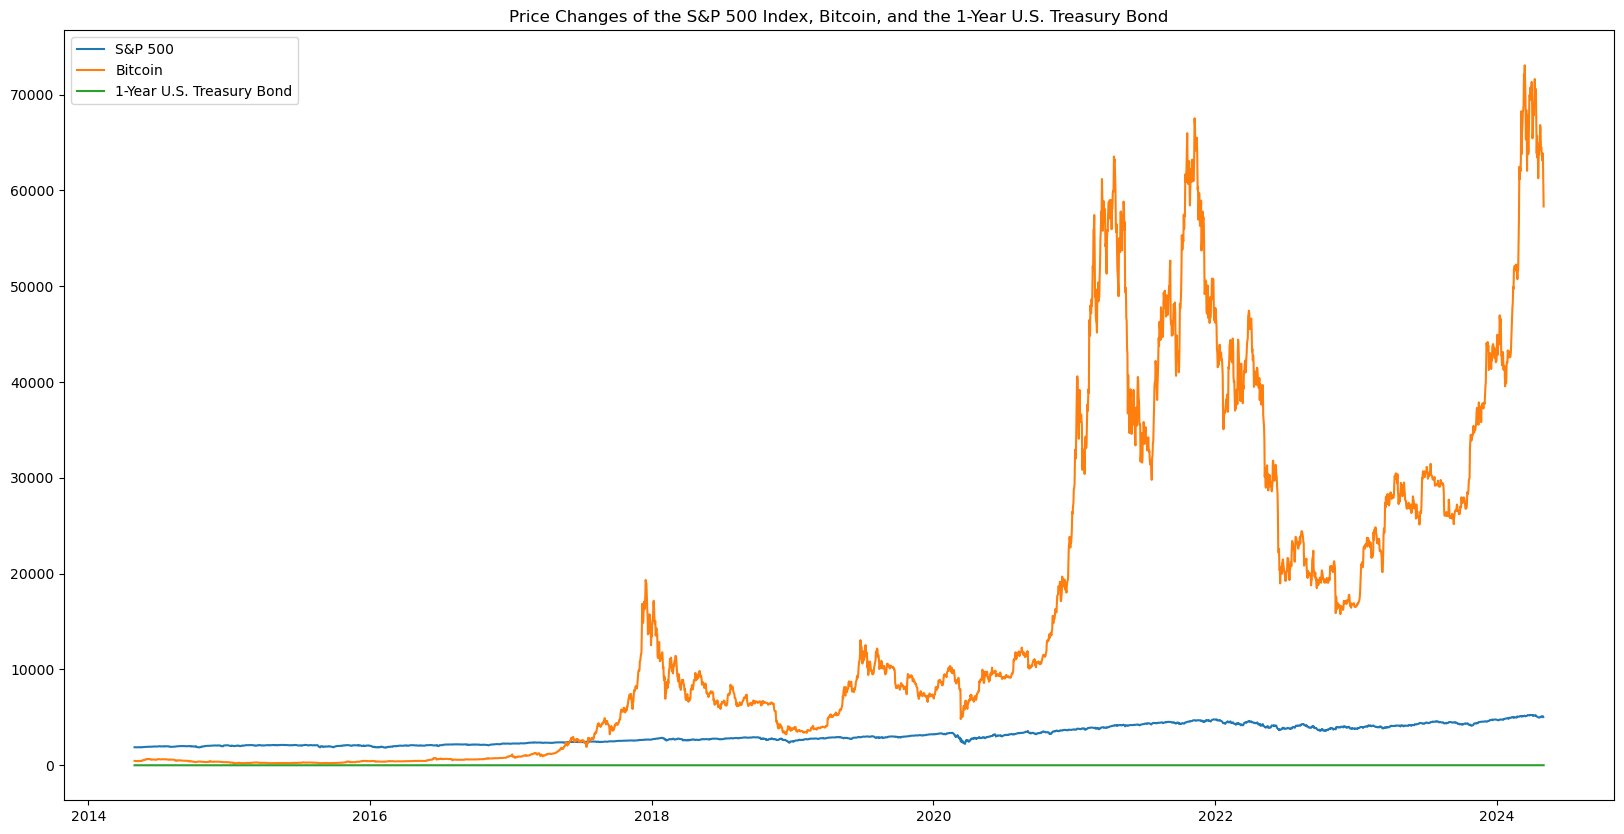

In [9]:
plt.figure(figsize=(20, 10))

plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin')
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond')

plt.title('Price Changes of the S&P 500 Index, Bitcoin, and the 1-Year U.S. Treasury Bond')
plt.legend()
plt.show()

As expected, the returns for Bitcoin over the last 10 years have been huge, significantly outpacing those of the S&P 500. The S&P 500 shows steady growth, while the 1-Year U.S. Treasury Bond prices have remained stable with little increase or decrease throughout their existence.


### S&P 500 Index

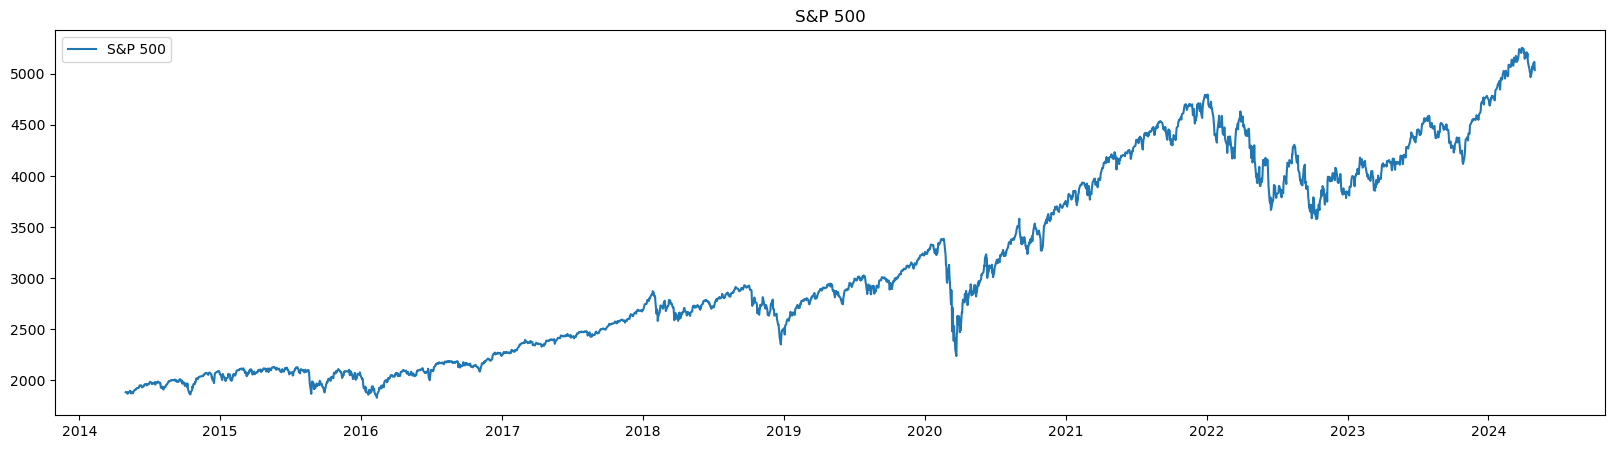

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(df_SP500.index, df_SP500['Price'], label='S&P 500')
plt.title('S&P 500')
plt.legend()
plt.grid(False)
plt.show()

### Bitcoin

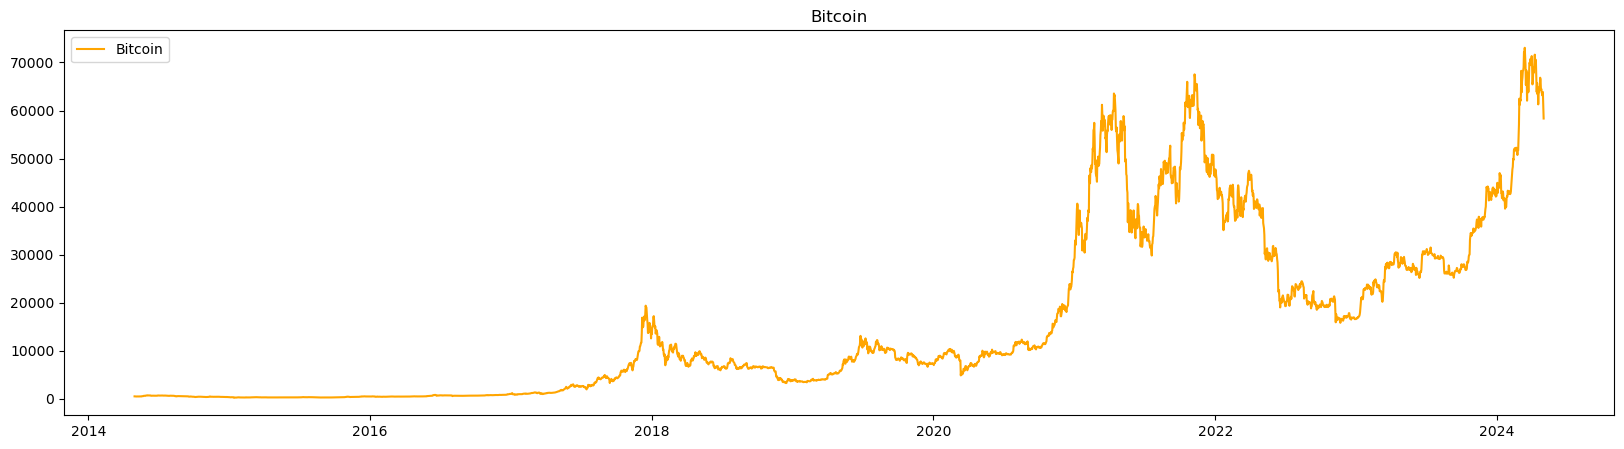

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(df_BTC.index, df_BTC['Price'], label='Bitcoin', color='orange')
plt.title('Bitcoin')
plt.legend()
plt.grid(False)
plt.show()

### 1-Year U.S. Treasury Bond

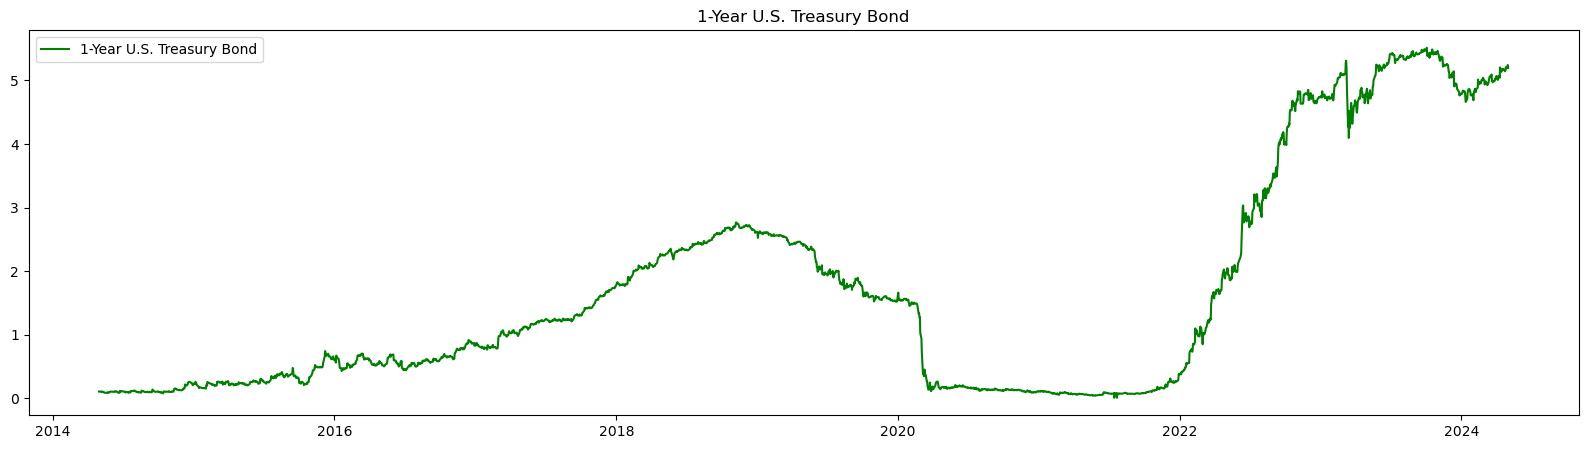

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Price'], label='1-Year U.S. Treasury Bond', color='green')
plt.title('1-Year U.S. Treasury Bond')
plt.legend()
plt.grid(False)
plt.show()

## Daily Returns

In [13]:
df_combined_returns = pd.concat([df_SP500[['Return']], df_BTC[['Return']], df_TMUBMUSD01Y[['Return']]], axis=1, join='inner')
df_combined_returns.columns = ['SP500_Return', 'BTC_Return', 'TMUBMUSD01Y_Return']

In [14]:
df_combined_returns

,SP500_Return,BTC_Return,TMUBMUSD01Y_Return
Date,,,
2014-05-01,NaN,NaN,NaN
2014-05-02,-0.001348,-0.013910,0.000000
2014-05-05,0.001871,-0.011697,-0.019231
2014-05-06,-0.008988,0.003017,0.000000
2014-05-07,0.005616,0.033087,-0.029412
...,...,...,...
2024-04-24,0.000213,-0.032061,0.001944
2024-04-25,-0.004576,0.003288,0.010475
2024-04-26,0.010209,-0.011329,-0.002496


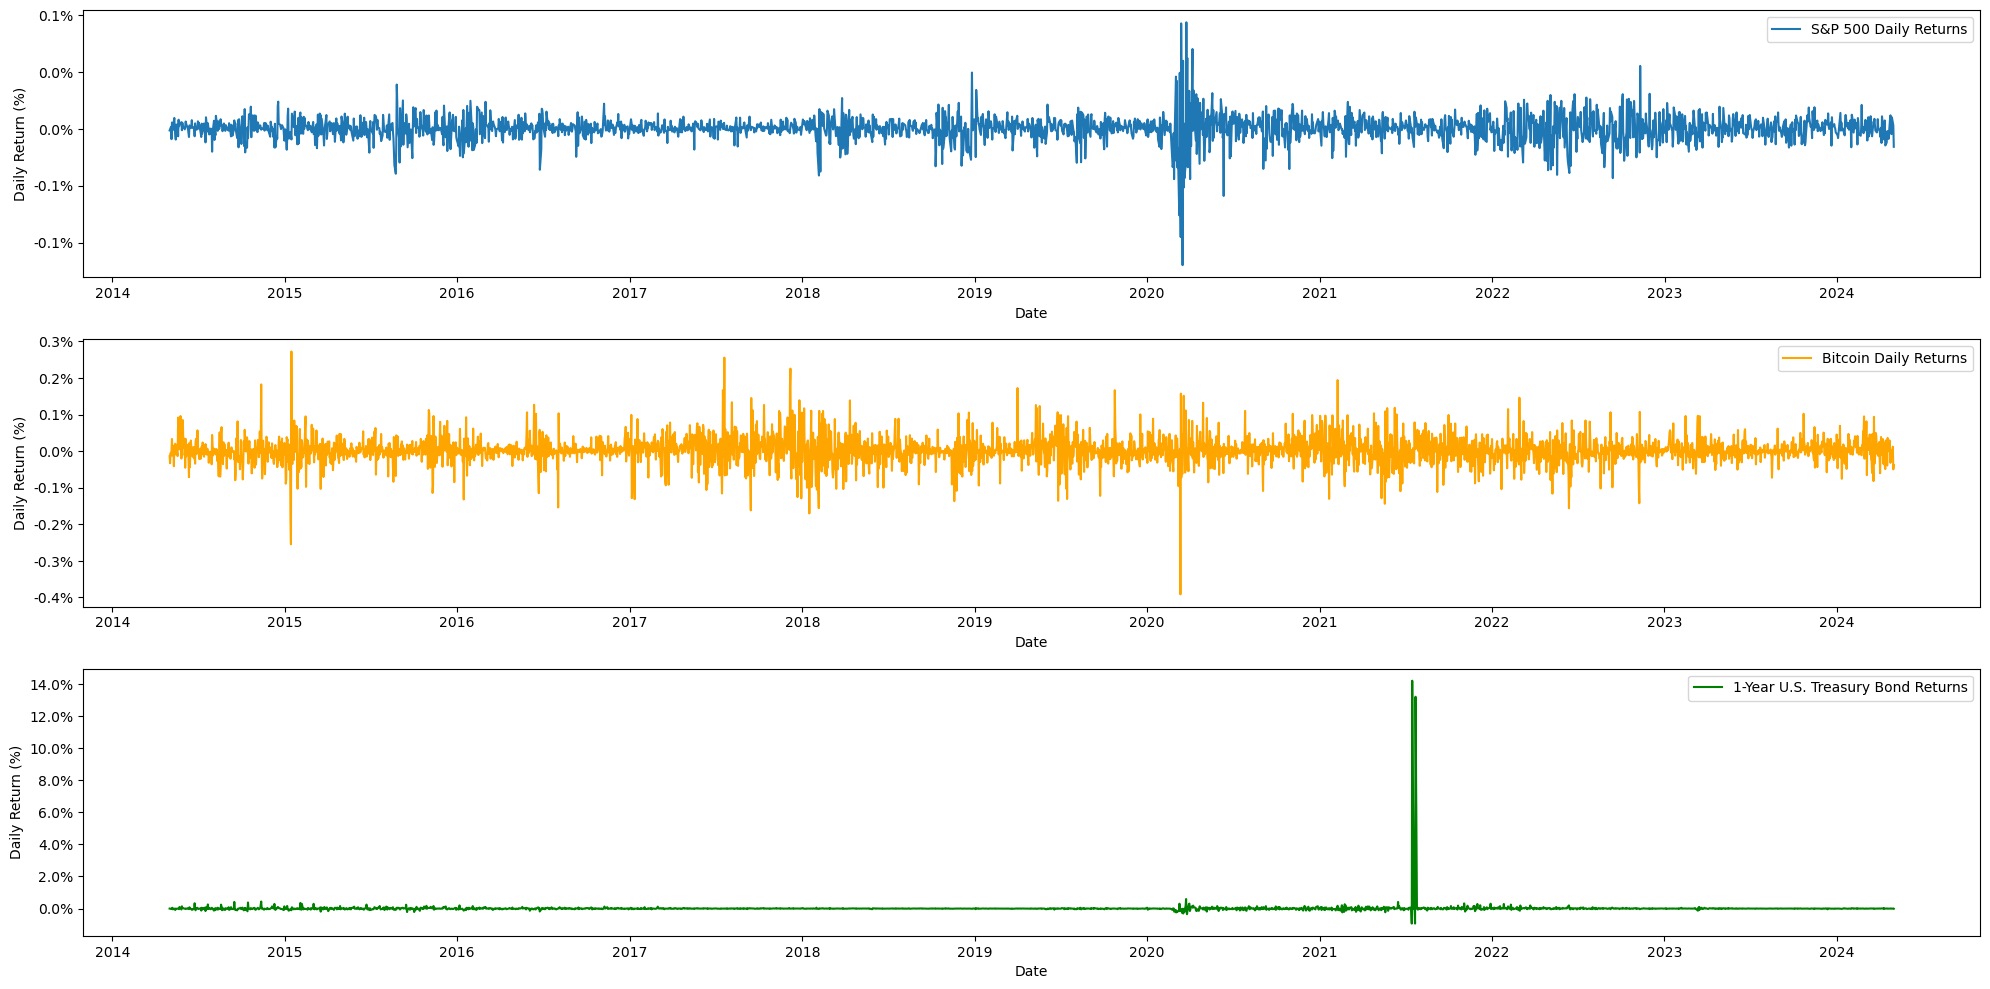

In [15]:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.plot(df_SP500.index, df_SP500['Return'], label='S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_BTC.index, df_BTC['Return'], label='Bitcoin Daily Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_TMUBMUSD01Y.index, df_TMUBMUSD01Y['Return'], label='1-Year U.S. Treasury Bond Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.legend()

plt.tight_layout()
plt.show()

This plot shows the daily returns for the S&P 500, Bitcoin, and the 1-Year U.S. Treasury Bond over the last 10 years. We can see that COVID-19 had a big impact, especially on the S&P 500 and Bitcoin returns, causing large spikes in volatility. The 1-Year U.S. Treasury Bond returns stayed mostly stable, with one significant spike during the pandemic.

## Forward-filling

In [16]:
""" Forward-filling missing values ensures consistency gaps 
by filling gaps with the last available observation, which is essential 
when aligning datasets with different trading schedules
, such as traditional markets and Bitcoin (Open on Weekends)."""

# This piece of code was taken from ChapGPT 
# Recommended using Forward-filling for S&P and 1Y US Treasury Bond

df_SP500 = df_SP500.asfreq('D').fillna(method='ffill')
df_TMUBMUSD01Y = df_TMUBMUSD01Y.asfreq('D').fillna(method='ffill')

# Linear Interpolation
df_SP500['Price'] = df_SP500['Price'].interpolate(method='linear')
df_TMUBMUSD01Y['Price'] = df_TMUBMUSD01Y['Price'].interpolate(method='linear')

In our opinion, this approach approximates reality the best. The last price on Friday will be the price for the entire weekend, which mirrors real-life market behavior. The same logic applies to holidays.

## Merging Files

Let's merge it all together with our macroeconomic factors:

In [17]:
# Merge files & Rename Columns
df_assets = pd.merge(df_SP500, df_BTC, on='Date', how='outer')
df_assets = pd.merge(df_assets, df_TMUBMUSD01Y, on='Date', how='outer')

df_assets.columns = ['SP500_Price', 'SP500_Return', 'BTC_Price', 'BTC_Return', 'TMUBMUSD01Y_Price', 'TMUBMUSD01Y_Return']

# Drop NaN
df_assets.dropna(subset=['SP500_Return', 'BTC_Return', 'TMUBMUSD01Y_Return'], inplace=True)

# print(df_assets.head())

### + Macroeconomic Indicators

The same approach applies to macroeconomic factors, where we use forward and backward filling to avoid any NaN values. This ensures data consistency and completeness:

In [18]:
# Forward-filling
macro_data = pd.concat([UN_Rate, Real_GDP, CPI, VIX, Ten_Year_Treasury_Yield, Federal_Funds_Rate, BBB_Credit_Spread], axis=1).ffill()

# Merge with the assets
df_assets = df_assets.join(macro_data, how='left')

# Ffill and Bfill
df_assets = df_assets.ffill().bfill()

#print(df_assets.head())

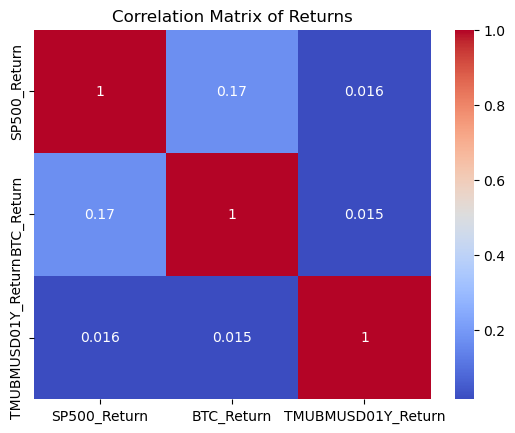

In [19]:
correlation_matrix = df_assets[['SP500_Return', 'BTC_Return', 'TMUBMUSD01Y_Return']].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Returns')
plt.show()

The correlation matrix shows that S&P 500 and Bitcoin returns have a weak positive correlation (0.17), while both have minimal correlation with 1-Year U.S. Treasury returns.

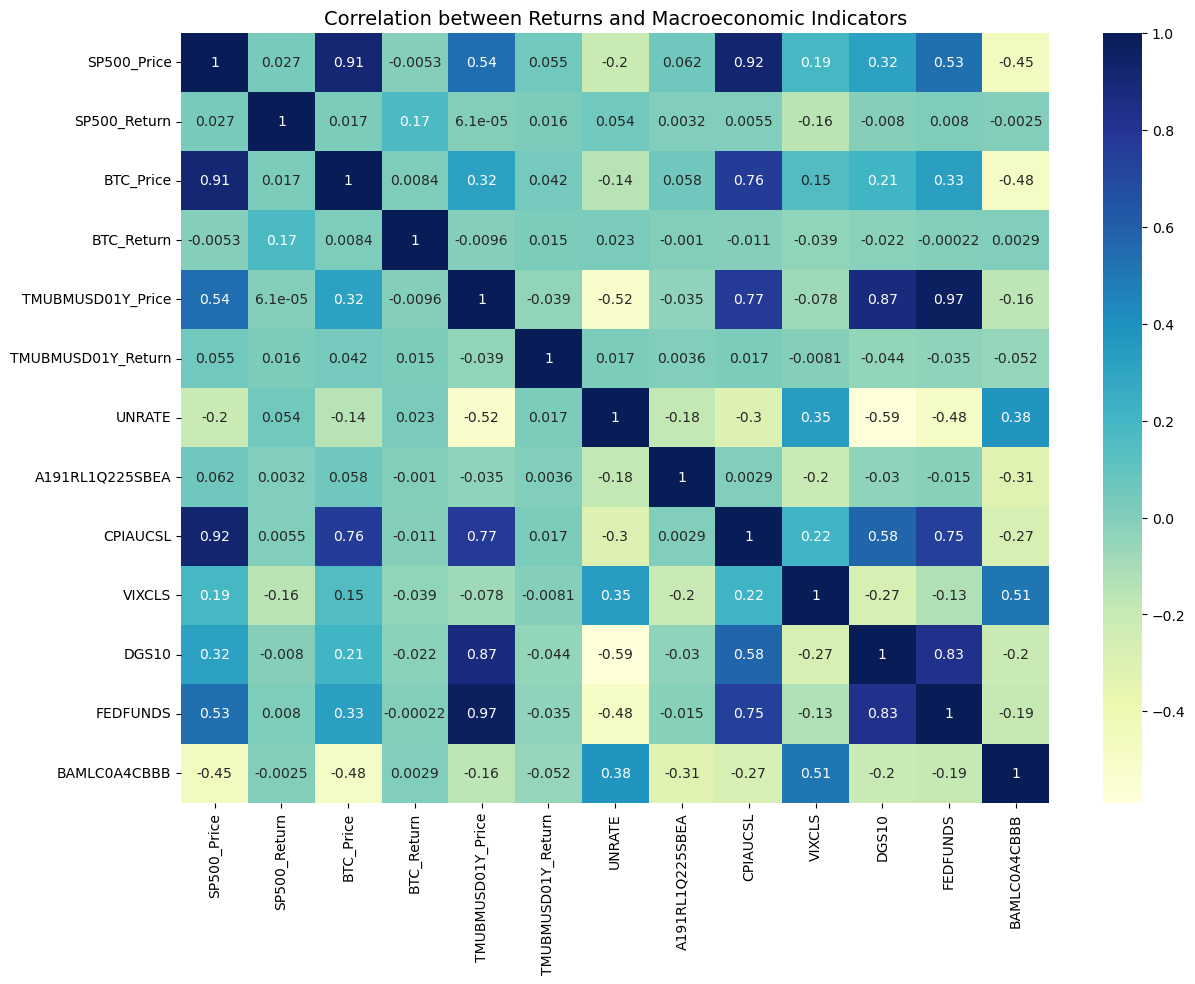

In [20]:
plt.figure(figsize=(14, 10))

correlation_matrix = df_assets.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Correlation between Returns and Macroeconomic Indicators', fontsize=14)

plt.show()

#### Federal Funds Rate (0.32 with S&P 500, 0.32 with Bitcoin, 0.32 with 1-Year Treasury):
- Federal Funds Rates are positively correlated with returns for all three assets;

#### BBB Credit Spread (0.45 with S&P 500, 0.53 with Bitcoin, 0.22 with 1-Year Treasury):
- Moderate positive correlations with S&P 500 and Bitcoin returns indicate that larger credit spreads (risk premiums) are associated with higher returns for these riskier assets;

- Positive correlation with 1-Year Treasury returns shows that during times of increased credit risk, investors seek the safety of Treasuries;

#### Unemployment Rate (-0.2 with S&P 500, -0.2 with Bitcoin, -0.4 with 1-Year Treasury):
- Higher unemployment rates are negatively correlated with S&P 500 and Bitcoin returns;
- Negative correlation with 1-Year Treasury returns shows that higher unemployment rates drive investors to seek safer investments;

#### Real GDP (0.06 with S&P 500, -0.2 with Bitcoin, -0.22 with 1-Year Treasury):
- Higher GDP growth has a small positive impact on stock market returns;
- Negative correlation with Bitcoin and 1-Year Treasury returns implies that higher GDP growth leads to lower returns for these assets;

#### Consumer Price Index (0.19 with S&P 500, 0.19 with Bitcoin, -0.2 with 1-Year Treasury):
- Positive correlations with S&P 500 and Bitcoin returns indicate that higher inflation (CPI) corresponds to higher returns;
- Negative correlation with 1-Year Treasury returns shows that higher inflation reduces Treasury returns;

#### Volatility Index (VIX) (0.32 with S&P 500, 0.32 with Bitcoin, 0.32 with 1-Year Treasury):
- Positive correlations across all three assets indicate that higher market volatility is associated with higher returns;

#### 10-Year Treasury Yield (0.32 with S&P 500, 0.32 with Bitcoin, 0.32 with 1-Year Treasury):
- Moderate positive correlations with all three assets, meaning higher yields may coincide with higher returns, reflecting economic growth and higher interest rates.

## Statistical Analysis

Alright, let's dive into the statistical analysis. This part is super important because it helps us understand the behavior of our data. By looking at things like summary statistics, skewness, kurtosis, and stationarity, we get a clearer picture of how the S&P 500, Bitcoin, and the 1-Year U.S. Treasury Bond have performed over time.

We’ll also run some tests and visualize the data to see if there are any patterns or anomalies. This step is crucial because it sets the foundation for more complex modeling later on. Essentially, it’s like getting to know our data really well before making any predictions or decisions.

So, let's get started and see what our data has to tell us!

### Summary

In [21]:
print(df_combined_returns.describe())

       SP500_Return   BTC_Return  TMUBMUSD01Y_Return
count   2500.000000  2500.000000         2500.000000
mean       0.000462     0.002399            0.013386
std        0.011183     0.039886            0.392496
min       -0.119841    -0.391816           -0.934211
25%       -0.003789    -0.013977           -0.011549
50%        0.000600     0.001383            0.000000
75%        0.005692     0.019091            0.013143
max        0.093828     0.272286           14.200000


In [22]:
print(df_combined_returns.skew())

SP500_Return          -0.518575
BTC_Return            -0.129652
TMUBMUSD01Y_Return    34.090014
dtype: float64


In [23]:
print(df_combined_returns.kurtosis())

SP500_Return            14.934157
BTC_Return               8.516432
TMUBMUSD01Y_Return    1192.704632
dtype: float64


S&P 500 and Bitcoin returns have small average returns, Bitcoin is more volatile. 
S&P 500 returns are slightly left skewed, while Bitcoin is nearly symmetrical. Both have high kurtosis, meaning there are extreme values (outliers). 
The 1-Year Treasury Bond returns show extreme positive skew and high kurtosis due to a few very large returns related to COVID. These results indicate non-normal distributions, but let's proceed with further analysis!

### ADF

In [24]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - stationary")
    else:
        print("Fail to reject the null hypothesis - non-stationary")

adf_test(df_combined_returns['SP500_Return'])
adf_test(df_combined_returns['BTC_Return'])
adf_test(df_combined_returns['TMUBMUSD01Y_Return'])

ADF Statistic: -15.696102760271685
p-value: 1.414508170385637e-28
Reject the null hypothesis - stationary
ADF Statistic: -27.879839702337552
p-value: 0.0
Reject the null hypothesis - stationary
ADF Statistic: -8.657891314817114
p-value: 4.9121247555258125e-14
Reject the null hypothesis - stationary


Data is already stationary, there is no need to use differencing.

### KDE

The KDE plots show that the distributions of S&P 500 and Bitcoin returns are centered around zero with heavy tails, suggesting high volatility. In contrast, the 1-Year U.S. Treasury Bond returns display positive skew with extreme values.

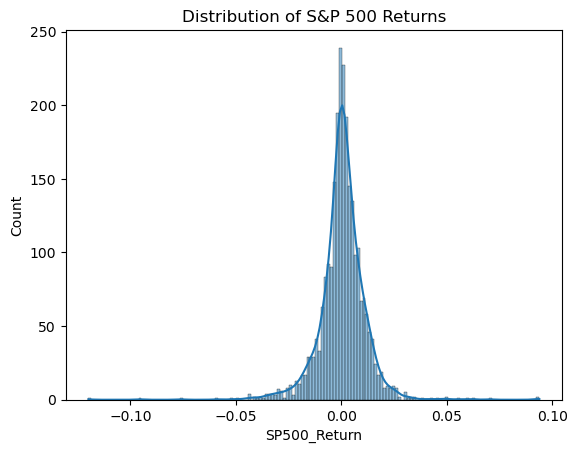

In [25]:
sns.histplot(df_combined_returns['SP500_Return'], kde=True)
plt.title('Distribution of S&P 500 Returns')
plt.show()

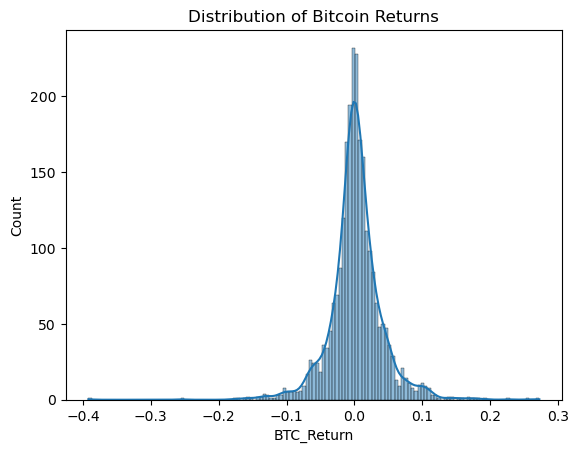

In [26]:
sns.histplot(df_combined_returns['BTC_Return'], kde=True)
plt.title('Distribution of Bitcoin Returns')
plt.show()

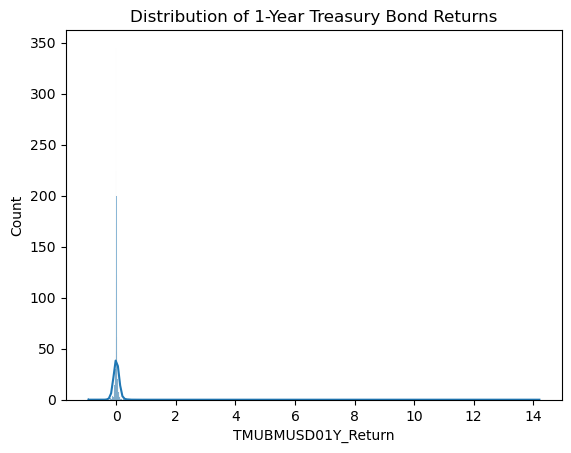

In [27]:
sns.histplot(df_combined_returns['TMUBMUSD01Y_Return'], kde=True)
plt.title('Distribution of 1-Year Treasury Bond Returns')
plt.show()

### Shapiro-Wilk Test

We can see from the plots and summary statistics that our data doesn't follow a normal distribution. However, to confirm our observations, we'll apply a statistical test, specifically the Shapiro-Wilk test. This will give us a more accurate understanding of the data's distribution.

In [28]:
def shapiro_test(series):
    stat, p_value = shapiro(series.dropna())
    print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')
    if p_value > 0.05:
        print("Fail to reject the null hypothesis - data is normally distributed")
    else:
        print("Reject the null hypothesis - data is not normally distributed")

In [29]:
print("SP500 Returns:")
shapiro_test(df_combined_returns['SP500_Return'])

print("\nBTC Returns:")
shapiro_test(df_combined_returns['BTC_Return'])

print("\n1-Year Treasury Bond Returns:")
shapiro_test(df_combined_returns['TMUBMUSD01Y_Return'])

SP500 Returns:
Shapiro-Wilk Test: Statistics=0.8778822422027588, p-value=1.5476921148928307e-40
Reject the null hypothesis - data is not normally distributed

BTC Returns:
Shapiro-Wilk Test: Statistics=0.9119336605072021, p-value=7.92419654261794e-36
Reject the null hypothesis - data is not normally distributed

1-Year Treasury Bond Returns:
Shapiro-Wilk Test: Statistics=0.05089300870895386, p-value=0.0
Reject the null hypothesis - data is not normally distributed


### Plots

The box plots show that both the S&P 500 and Bitcoin returns have many outliers, meaning there are some extreme values. The 1-Year U.S. Treasury Bond returns also have some very high values.

We should look into these extreme values to see if they are linked to specific market events.

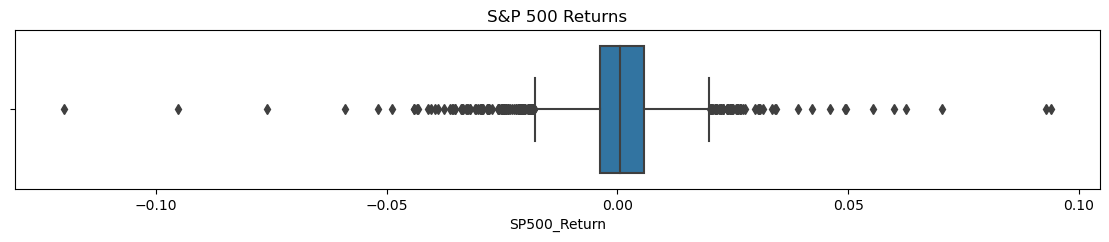

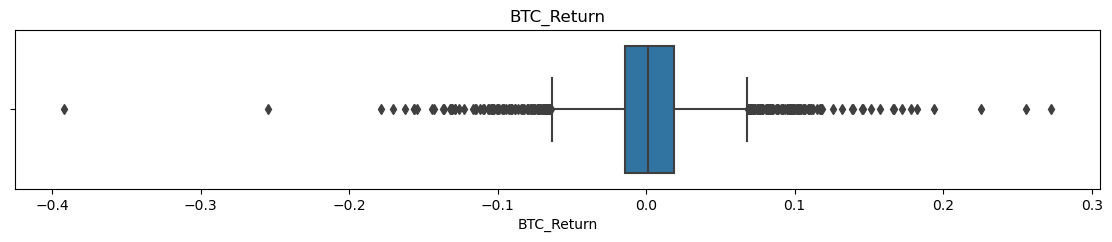

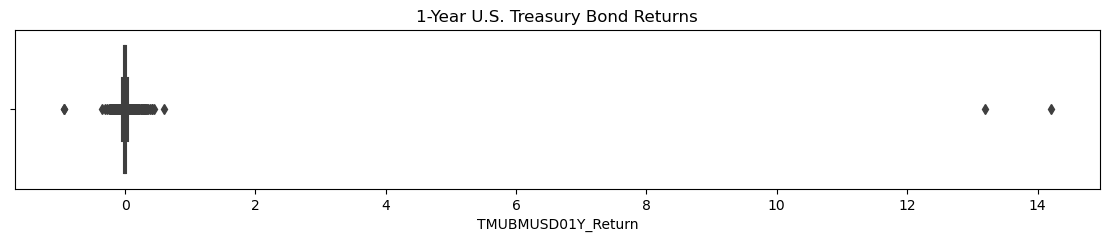

In [30]:
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.boxplot(x=df_combined_returns['SP500_Return'])
plt.title('S&P 500 Returns')

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 2)
sns.boxplot(x=df_combined_returns['BTC_Return'])
plt.title('BTC_Return')

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 3)
sns.boxplot(x=df_combined_returns['TMUBMUSD01Y_Return'])
plt.title('1-Year U.S. Treasury Bond Returns')

plt.show()

### Outliers

In [31]:
def extreme_values(df, column, percentile=0.01):
    threshold_high = df[column].quantile(1 - percentile)
    threshold_low = df[column].quantile(percentile)
    high = df[df[column] >= threshold_high]
    low = df[df[column] <= threshold_low]
    return high, low

In [32]:
high_sp500, low_sp500 = extreme_values(df_combined_returns, 'SP500_Return')
high_btc, low_btc = extreme_values(df_combined_returns, 'BTC_Return')
high_treasury, low_treasury = extreme_values(df_combined_returns, 'TMUBMUSD01Y_Return')

In [33]:
extreme_sp500_dates = high_sp500.index.union(low_sp500.index)
print(extreme_sp500_dates)

DatetimeIndex(['2015-08-24', '2015-08-26', '2016-06-24', '2018-02-05',
               '2018-02-08', '2018-03-26', '2018-10-10', '2018-12-26',
               '2019-01-04', '2020-02-24', '2020-02-27', '2020-03-02',
               '2020-03-04', '2020-03-05', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-20', '2020-03-24',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-04-01',
               '2020-04-06', '2020-04-08', '2020-04-14', '2020-04-17',
               '2020-04-29', '2020-05-18', '2020-06-11', '2020-09-03',
               '2020-10-28', '2022-04-29', '2022-05-04', '2022-05-05',
               '2022-05-18', '2022-06-13', '2022-06-24', '2022-07-19',
               '2022-08-26', '2022-09-13', '2022-10-04', '2022-10-17',
               '2022-11-10', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [34]:
extreme_btc_dates = high_btc.index.union(low_btc.index)
print(extreme_btc_dates)

DatetimeIndex(['2014-11-12', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-11-02', '2015-11-10', '2016-01-15', '2016-06-22',
               '2016-08-02', '2017-01-05', '2017-01-11', '2017-07-17',
               '2017-07-20', '2017-09-14', '2017-09-15', '2017-09-18',
               '2017-10-12', '2017-12-06', '2017-12-07', '2017-12-22',
               '2017-12-26', '2018-01-05', '2018-01-16', '2018-02-05',
               '2018-04-12', '2018-11-19', '2019-04-02', '2019-05-13',
               '2019-06-27', '2019-07-16', '2019-09-24', '2019-10-25',
               '2020-03-12', '2020-03-13', '2020-03-19', '2020-03-23',
               '2020-04-29', '2021-01-21', '2021-02-08', '2021-05-12',
               '2021-05-19', '2021-05-24', '2021-06-09', '2021-06-21',
               '2021-09-07', '2022-02-04', '2022-02-28', '2022-05-09',
               '2022-06-13', '2022-11-09'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [35]:
extreme_treasury_dates = high_treasury.index.union(low_treasury.index)
print(extreme_treasury_dates)

DatetimeIndex(['2014-06-24', '2014-07-22', '2014-08-19', '2014-09-16',
               '2014-10-14', '2014-10-15', '2014-11-12', '2014-12-10',
               '2015-02-03', '2015-02-06', '2015-03-03', '2015-03-18',
               '2015-06-23', '2015-09-15', '2015-09-17', '2015-10-02',
               '2016-06-24', '2020-02-28', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-10', '2020-03-16',
               '2020-03-18', '2020-03-20', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-30', '2020-03-31', '2020-05-07',
               '2021-02-18', '2021-02-22', '2021-02-23', '2021-03-19',
               '2021-03-29', '2021-05-20', '2021-06-16', '2021-07-15',
               '2021-07-16', '2021-07-22', '2021-07-23', '2021-11-03',
               '2021-11-05', '2021-11-26', '2021-12-01', '2021-12-29',
               '2022-01-26', '2022-02-10'],
              dtype='datetime64[ns]', name='Date', freq=None)


### Conclusion

COVID-19 pandemic was the major driver of extreme market movements across these different asset classes.

## ACF & PACF

Let's look at the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) tests. These tests show how current values relate to past values in our data.

The ACF tells us if there's a pattern over time by checking the correlation between different time points. High values mean the data points are related.

The PACF shows the direct correlation between current and past values, removing the effect of values in between. This helps pinpoint where the data is most strongly correlated.

<Figure size 1200x600 with 0 Axes>

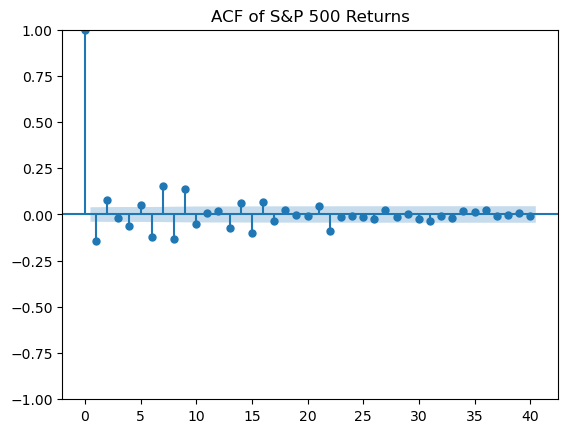

<Figure size 1200x600 with 0 Axes>

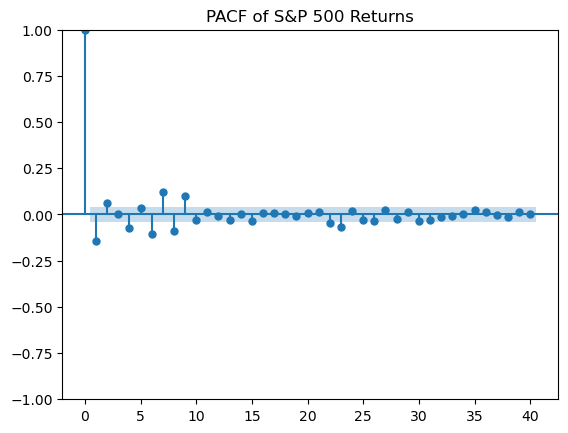

In [36]:
plt.figure(figsize=(12, 6))
plot_acf(df_combined_returns['SP500_Return'].dropna(), lags=40)
plt.title('ACF of S&P 500 Returns')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_combined_returns['SP500_Return'].dropna(), lags=40)
plt.title('PACF of S&P 500 Returns')
plt.show()

The ACF and PACF plots show a big spike at lag 1, meaning the S&P 500 returns are influenced by their immediate past values. After that, the correlations drop off quickly, so there's not much long-term pattern.

<Figure size 1200x600 with 0 Axes>

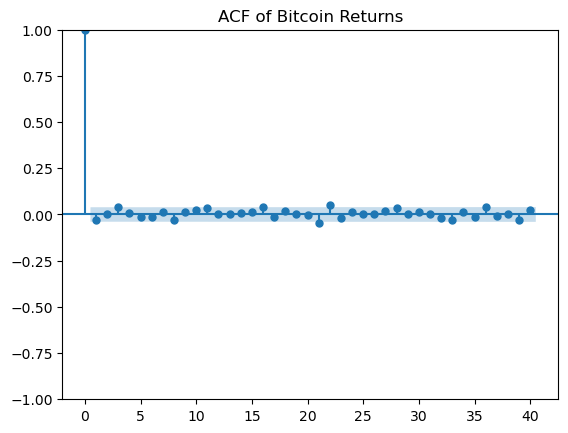

<Figure size 1200x600 with 0 Axes>

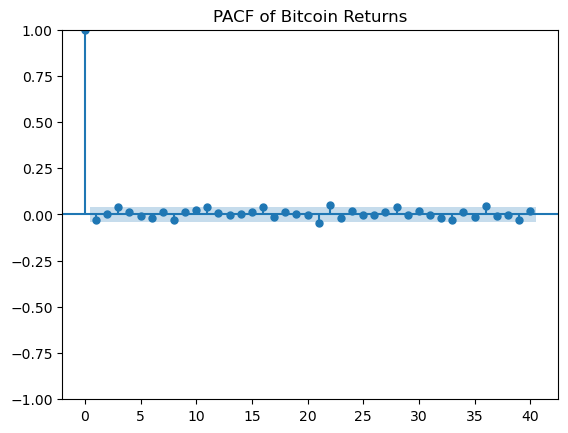

In [37]:
plt.figure(figsize=(12, 6))
plot_acf(df_combined_returns['BTC_Return'].dropna(), lags=40)
plt.title('ACF of Bitcoin Returns')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_combined_returns['BTC_Return'].dropna(), lags=40)
plt.title('PACF of Bitcoin Returns')
plt.show()

The ACF and PACF plots show a big spike at lag 1, meaning Bitcoin returns are influenced by their immediate past values. After that, the correlations drop off quickly, so there's not much long-term pattern.

<Figure size 1200x600 with 0 Axes>

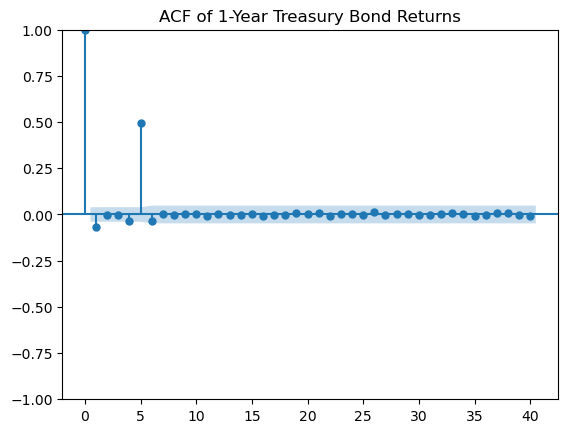

<Figure size 1200x600 with 0 Axes>

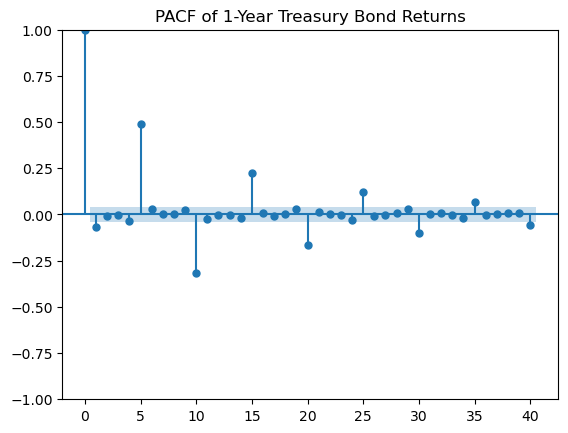

In [38]:
plt.figure(figsize=(12, 6))
plot_acf(df_combined_returns['TMUBMUSD01Y_Return'].dropna(), lags=40)
plt.title('ACF of 1-Year Treasury Bond Returns')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_combined_returns['TMUBMUSD01Y_Return'].dropna(), lags=40)
plt.title('PACF of 1-Year Treasury Bond Returns')
plt.show()

The ACF and PACF plots for the 1-Year Treasury Bond show a big spike at lag 1, indicating that returns are influenced by their immediate past values. There's another noticeable spike at lag 2, but overall, the long-term correlations are low.

# Feature Engineering

## Calculating Log Returns

In [39]:
df_assets['SP500_Log_Return'] = np.log(df_assets['SP500_Price'] / df_assets['SP500_Price'].shift(1))
df_assets['BTC_Log_Return'] = np.log(df_assets['BTC_Price'] / df_assets['BTC_Price'].shift(1))
df_assets['TMUBMUSD01Y_Log_Return'] = np.log(df_assets['TMUBMUSD01Y_Price'] / df_assets['TMUBMUSD01Y_Price'].shift(1))

### We used log returns instead of simple returns for VaR metrics for a few reasons:
1. Log returns add up over time, which makes them easier to work with.
2. They tend to be more normally distributed, which aligns with our statistical results above.
3. Log returns treat ups and downs more symmetrically, so they're less skewed by big jumps.
4. They assume continuous compounding, which matches how most financial instruments are priced.

## Calculating Lagged Returns

In [40]:
df_assets['SP500_Lagged_Return'] = df_assets['SP500_Return'].shift(1)
df_assets['BTC_Lagged_Return'] = df_assets['BTC_Return'].shift(1)
df_assets['TMUBMUSD01Y_Lagged_Return'] = df_assets['TMUBMUSD01Y_Return'].shift(1)

Lagged returns are just the returns from the previous day. We use them to capture how today's returns are influenced by yesterday's returns. Our PACF results showed big spikes at lag 1 for all the assets, meaning there's a strong immediate correlation. So, it makes sense to include lagged returns in our model.Lagged Log Returns: Calculated to capture temporal dependencies and previous returns impact.

## Rolling Statistics

#### Calculate and plot rolling std for all portfolios with 21-day window

In [41]:
# Reference: Portfolio_Performance repository
# File: whale_analysis.ipynb
# URL: https://github.com/lrb924/Portfolio_Performance/blob/main/whale_analysis.ipynb

window = 21

df_assets['SP500_Rolling_Mean'] = df_assets['SP500_Log_Return'].rolling(window).mean()
df_assets['SP500_Rolling_Std'] = df_assets['SP500_Log_Return'].rolling(window).std()

df_assets['BTC_Rolling_Mean'] = df_assets['BTC_Log_Return'].rolling(window).mean()
df_assets['BTC_Rolling_Std'] = df_assets['BTC_Log_Return'].rolling(window).std()

df_assets['TMUBMUSD01Y_Rolling_Mean'] = df_assets['TMUBMUSD01Y_Log_Return'].rolling(window).mean()
df_assets['TMUBMUSD01Y_Rolling_Std'] = df_assets['TMUBMUSD01Y_Log_Return'].rolling(window).std()

We used a 21-day rolling window to calculate the rolling mean and standard deviation for each asset in our dataset. The rolling mean provides an average return over the past 21 days, while the rolling standard deviation measures the volatility over the same period. These rolling statistics help us track how the average returns and volatility change over time, smoothing out short-term fluctuations and providing a better sense of long-term trends.

Incorporating these rolling statistics into our Monte Carlo VaR model is essential for making the simulations more realistic. By including the rolling mean and standard deviation, we ensure that our model takes into account recent trends and volatility. This makes our risk assessments more accurate, reflecting the actual market conditions more closely.

The idea to use rolling statistics came from a project in the Portfolio_Performance repository from the file "whale_analysis.ipynb". This approach inspired us to integrate similar calculations into our model to improve the robustness of our risk analysis.

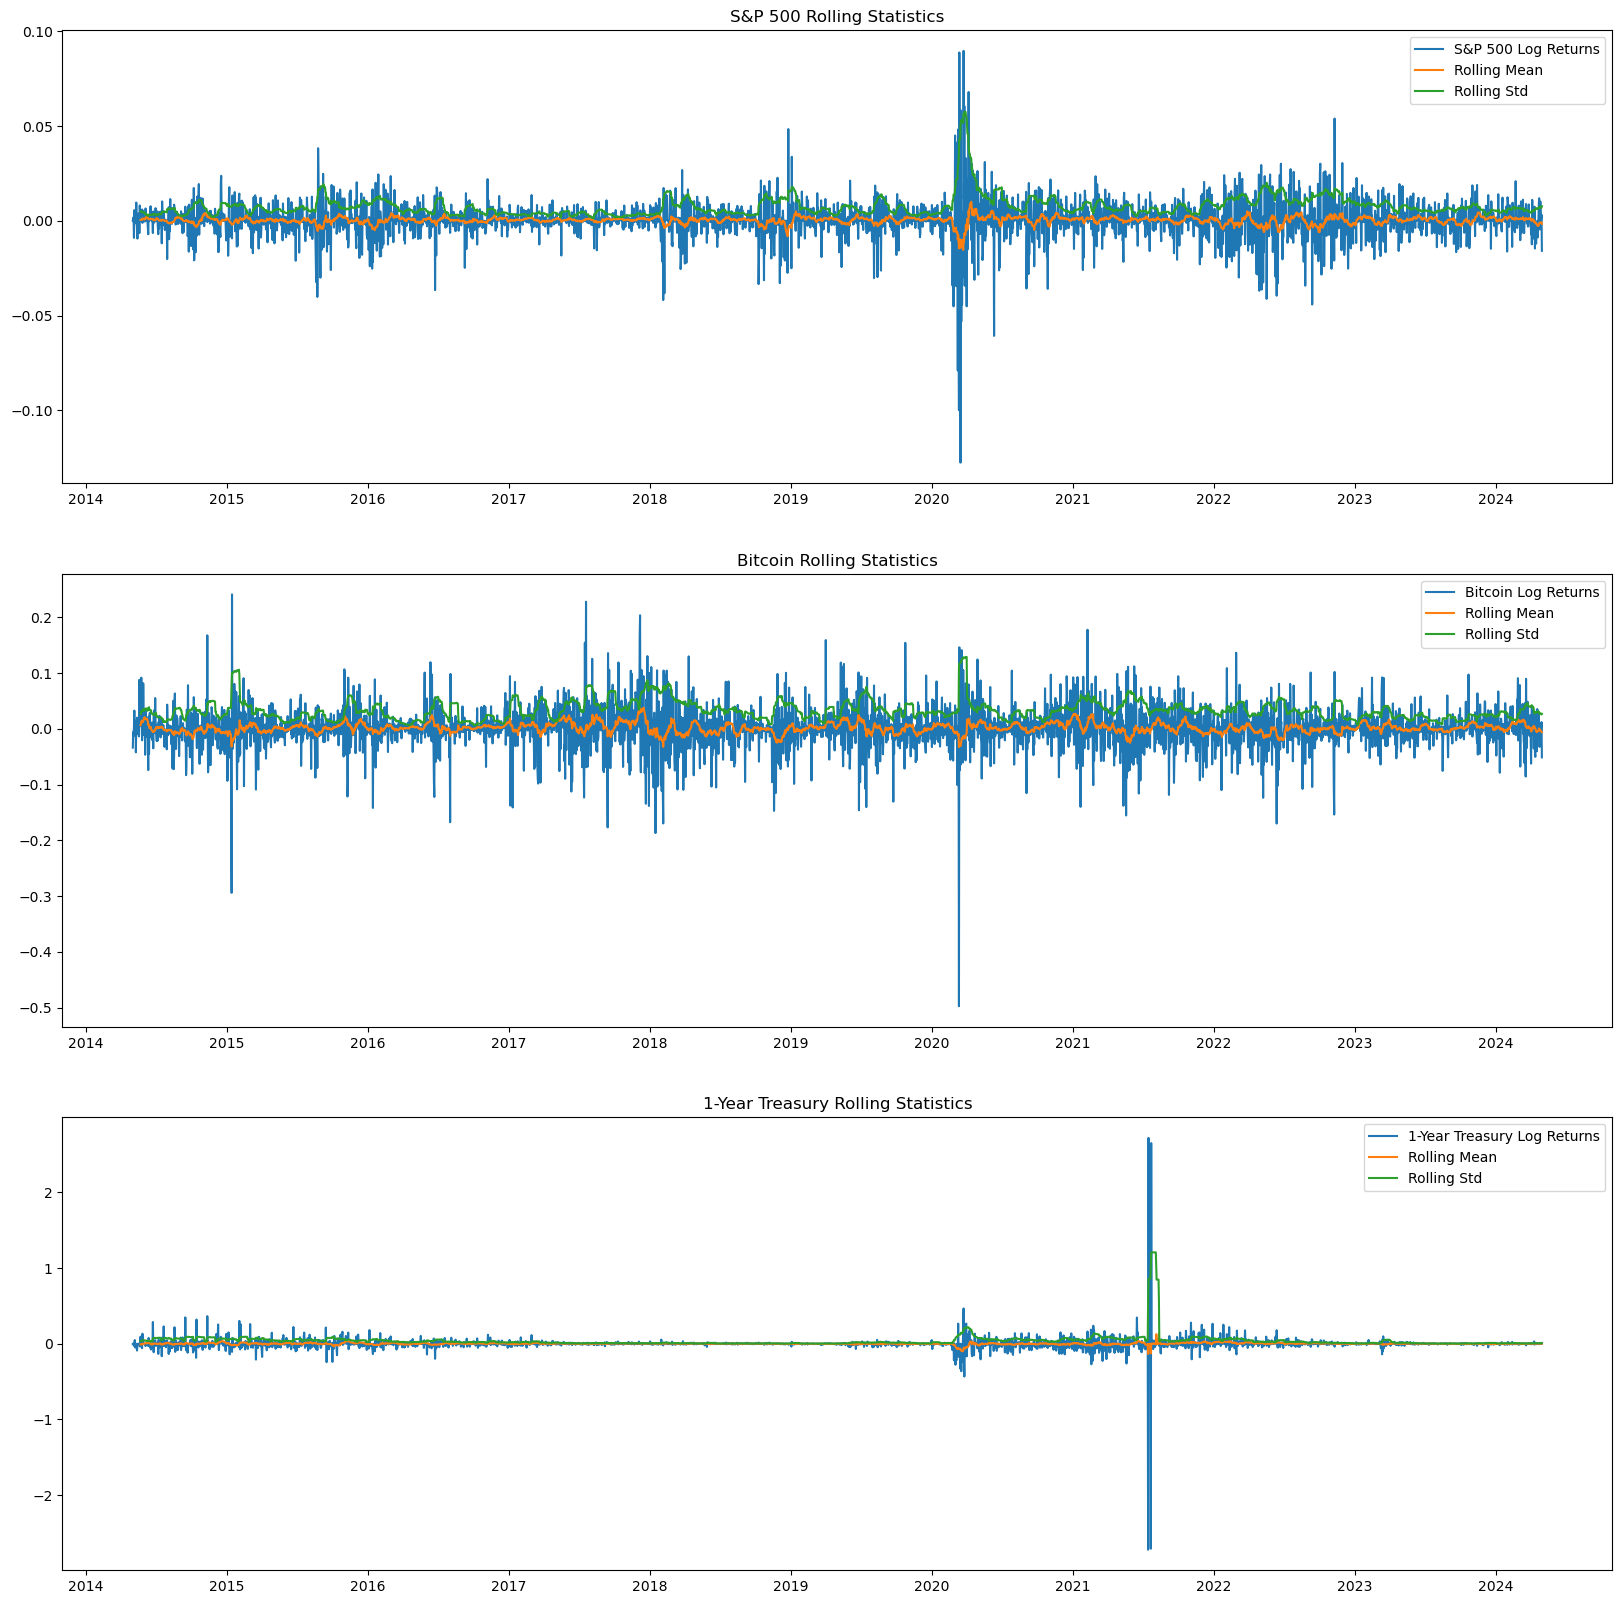

In [42]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.plot(df_assets.index, df_assets['SP500_Log_Return'], label='S&P 500 Log Returns')
plt.plot(df_assets.index, df_assets['SP500_Rolling_Mean'], label='Rolling Mean')
plt.plot(df_assets.index, df_assets['SP500_Rolling_Std'], label='Rolling Std')
plt.title('S&P 500 Rolling Statistics')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_assets.index, df_assets['BTC_Log_Return'], label='Bitcoin Log Returns')
plt.plot(df_assets.index, df_assets['BTC_Rolling_Mean'], label='Rolling Mean')
plt.plot(df_assets.index, df_assets['BTC_Rolling_Std'], label='Rolling Std')
plt.title('Bitcoin Rolling Statistics')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_assets.index, df_assets['TMUBMUSD01Y_Log_Return'], label='1-Year Treasury Log Returns')
plt.plot(df_assets.index, df_assets['TMUBMUSD01Y_Rolling_Mean'], label='Rolling Mean')
plt.plot(df_assets.index, df_assets['TMUBMUSD01Y_Rolling_Std'], label='Rolling Std')
plt.title('1-Year Treasury Rolling Statistics')
plt.legend()

plt.show()

## Exponential Moving averages

In [43]:
df_assets['SP500_EMA'] = df_assets['SP500_Log_Return'].ewm(span=21, adjust=False).mean()
df_assets['BTC_EMA'] = df_assets['BTC_Log_Return'].ewm(span=21, adjust=False).mean()
df_assets['TMUBMUSD01Y_EMA'] = df_assets['TMUBMUSD01Y_Log_Return'].ewm(span=21, adjust=False).mean()

The EMA gives us a smoothed average return, putting more weight on recent data points, which helps capture the latest market trends. Unlike a simple moving average, the EMA responds faster to recent price changes.

Incorporating the EMA into our Monte Carlo VaR model is crucial for accurately reflecting current market conditions. By including the EMA, our model stays up-to-date with recent trends, making our risk assessments more responsive to market dynamics.

## Interaction Features

Let's make a compreensive use of the macroeconomic indicators and add interactions between them and between them and macroeconomic indicators.

In [44]:
# Interaction between Log Returns
df_assets['SP500_BTC_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['BTC_Log_Return']
df_assets['SP500_Treasury_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['TMUBMUSD01Y_Log_Return']
df_assets['BTC_Treasury_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['TMUBMUSD01Y_Log_Return']

# Interaction between SP500 Log Returns and macroeconomic indicators
df_assets['SP500_UNRATE_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['UNRATE']
df_assets['SP500_GDP_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['A191RL1Q225SBEA']
df_assets['SP500_CPI_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['CPIAUCSL']
df_assets['SP500_VIX_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['VIXCLS']
df_assets['SP500_Treasury_Yield_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['DGS10']
df_assets['SP500_Fed_Funds_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['FEDFUNDS']
df_assets['SP500_Credit_Spread_Interaction'] = df_assets['SP500_Log_Return'] * df_assets['BAMLC0A4CBBB']

# Interaction between Bitcoin Log Returns and macroeconomic indicators
df_assets['BTC_UNRATE_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['UNRATE']
df_assets['BTC_GDP_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['A191RL1Q225SBEA']
df_assets['BTC_CPI_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['CPIAUCSL']
df_assets['BTC_VIX_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['VIXCLS']
df_assets['BTC_Treasury_Yield_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['DGS10']
df_assets['BTC_Fed_Funds_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['FEDFUNDS']
df_assets['BTC_Credit_Spread_Interaction'] = df_assets['BTC_Log_Return'] * df_assets['BAMLC0A4CBBB']

# Interaction between 1-Year Treasury Log Returns and macroeconomic indicators
df_assets['Treasury_UNRATE_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['UNRATE']
df_assets['Treasury_GDP_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['A191RL1Q225SBEA']
df_assets['Treasury_CPI_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['CPIAUCSL']
df_assets['Treasury_VIX_Interaction_Log'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['VIXCLS']
df_assets['Treasury_Treasury_Yield_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['DGS10']
df_assets['Treasury_Fed_Funds_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['FEDFUNDS']
df_assets['Treasury_Credit_Spread_Interaction'] = df_assets['TMUBMUSD01Y_Log_Return'] * df_assets['BAMLC0A4CBBB']

Interaction Terms: Created between log returns and macroeconomic indicators to capture combined effects.

## Let's check how the data looks at this point:

In [45]:
df_assets.dropna()

,SP500_Price,SP500_Return,BTC_Price,BTC_Return,TMUBMUSD01Y_Price,TMUBMUSD01Y_Return,UNRATE,A191RL1Q225SBEA,CPIAUCSL,VIXCLS,...,BTC_Treasury_Yield_Interaction,BTC_Fed_Funds_Interaction,BTC_Credit_Spread_Interaction,Treasury_UNRATE_Interaction,Treasury_GDP_Interaction,Treasury_CPI_Interaction,Treasury_VIX_Interaction_Log,Treasury_Treasury_Yield_Interaction,Treasury_Fed_Funds_Interaction,Treasury_Credit_Spread_Interaction
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-23,1900.530029,0.004248,518.1,0.005239,0.089,0.098765,6.3,5.0,236.918,11.36,...,0.013271,0.000470,0.007890,0.593379,0.470936,22.314647,1.069967,0.239236,0.008477,0.142223
2014-05-24,1900.530029,0.004248,520.5,0.004632,0.089,0.098765,6.3,5.0,236.918,11.36,...,0.011739,0.000416,0.006979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-25,1900.530029,0.004248,570.4,0.095869,0.089,0.098765,6.3,5.0,236.918,11.36,...,0.232532,0.008239,0.138237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-26,1900.530029,0.004248,582.0,0.020337,0.089,0.098765,6.3,5.0,236.918,11.36,...,0.051137,0.001812,0.030400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-27,1911.910034,0.005988,570.1,-0.020447,0.084,-0.056180,6.3,5.0,236.918,11.51,...,-0.052060,-0.001859,-0.030988,-0.364263,-0.289098,-13.698497,-0.665503,-0.145705,-0.005204,-0.086729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,5099.959961,0.010209,63766.4,-0.011329,5.196,-0.002496,3.9,1.3,313.207,15.03,...,-0.053209,-0.060729,-0.012875,-0.009745,-0.003248,-0.782642,-0.037557,-0.011669,-0.013319,-0.002824
2024-04-27,5099.959961,0.010209,63456.8,-0.004855,5.196,-0.002496,3.9,1.3,313.207,15.03,...,-0.022729,-0.025941,-0.005500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-04-28,5099.959961,0.010209,63109.7,-0.005470,5.196,-0.002496,3.9,1.3,313.207,15.03,...,-0.025614,-0.029234,-0.006198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# MonteCarlo VaR

## 1. Parameters:

- **Assets**: S&P 500, Bitcoin, 1-Year Treasury Bond
- **Number of simulations**: 10000
- **Number of days**: 10
- **Alpha**: 5%
- **Confidence Level**: \(1 - $\alpha$ = 95\%\)

In [46]:
assets = ['SP500', 'BTC', 'TMUBMUSD01Y']
n_simulations = 10000
n_days = 10
confidence_level = 0.95
feature_weight = 0.25  # Weight for feature adjustments

## 2. Function to generate future scenarios:

- **last_price:** last known price of each asset.
- **last_features**: last row of features.
- **simulated_paths**: it's basically a matrix that stores simulated price paths.

In [47]:
def simulate_price_paths(scaled_df, asset, n_simulations, n_days, feature_weight):
    last_price = df_assets[f'{asset}_Price'].iloc[-1]
    last_features = scaled_df.iloc[-1].copy()
    simulated_paths = np.zeros((n_days, n_simulations))

    for i in range(n_simulations):
        simulated_returns = []
        for j in range(n_days):
            base_return = np.random.choice(df_assets[f'{asset}_Log_Return'].dropna())
            feature_adjustment = feature_weight * (last_features[f'{asset}_Lagged_Return'] +
                                                   last_features[f'{asset}_Rolling_Mean'] +
                                                   last_features[f'{asset}_EMA'])
            adjusted_return = base_return + feature_adjustment
            simulated_returns.append(adjusted_return)
            last_features[f'{asset}_Log_Return'] = adjusted_return
            last_features[f'{asset}_Lagged_Return'] = adjusted_return
            last_features[f'{asset}_Rolling_Mean'] = np.mean(simulated_returns)
            last_features[f'{asset}_Rolling_Std'] = np.std(simulated_returns)
            last_features[f'{asset}_EMA'] = last_features[f'{asset}_EMA'] * 0.95 + adjusted_return * 0.5

        simulated_paths[:, i] = last_price * np.exp(np.cumsum(simulated_returns))
    return simulated_paths

#### Outer Loop:
The loop **`for i in range(n_simulations)`** runs a specified number of simulations (10000) to predict the future prices of an asset over a given number of days. For each simulation:
- **`simulated_returns`** is initialized as an empty list to store the simulated log returns for each day within the current simulation.

#### Inner Loop:
The loop **`for j in range(n_days)`** runs a specified number of simulations (10000) to predict the future prices of an asset over a given number of days (7);

#### Base return:
We are selecting any historical log return randomly for our simulation:

**`np.random.choice(df_assets[f'{asset}_Log_Return'].dropna())`**

#### Feature Adjustment:
**`feature_adjustment = feature_weight * ( last_features[f'{asset}_Lagged_Return'] +     last_features[f'{asset}_Rolling_Mean'] + last_features[f'{asset}_EMA'])`**
 
 **`adjusted_return = base_return + feature_adjustment`**

Our return will be adjusted by 10% * Features (calculated in feature engineering section)
            
#### This section of the code updates the simulation's running list of returns and dynamically adjusts feature values based on these returns:

`simulated_returns.append(adjusted_return)`

`last_features[f'{asset}_Log_Return'] = adjusted_return
last_features[f'{asset}_Lagged_Return'] = adjusted_return
last_features[f'{asset}_Rolling_Mean'] = np.mean(simulated_returns)
last_features[f'{asset}_Rolling_Std'] = np.std(simulated_returns)`

To give more weight to the recent returns:

`last_features[f'{asset}_EMA'] = last_features[f'{asset}_EMA'] * 0.90 + adjusted_return * 0.10`

#### Cumulative returns:
`simulated_paths[:, i] = last_price * np.exp(np.cumsum(simulated_returns))`

## 3. Function to calculate VaR:

The `calculate_VaR` function calculates the VaR for each asset using simulated price paths. 
It computes returns from the simulations and then finds the value at 95th percentile, representing the maximum expected loss at a given confidence level. This VaR value corresponds to the worst-case loss that is not expected to be exceeded with the chosen confidence level.

In [48]:
def calculate_VaR(simulated_paths, confidence_level):
    simulated_returns = simulated_paths[-1, :] / simulated_paths[0, :] - 1
    VaR = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    return VaR

#### Store Results:
`VaR_results = {}`

#### Loop Over Assets:
- Iterates through each asset in the assets list ('SP500', 'BTC', 'TMUBMUSD01Y') to perform the simulation and VaR calculation individually for each one.

`for asset in assets:`

#### Simulate Price Paths:
- Calls the simulate_price_paths function, which generates future price paths for the asset based on historical log returns and feature adjustments. 

`simulated_paths = simulate_price_paths(df_assets, asset, n_simulations=10000, n_days=7, feature_weight=0.05)`

#### Calculate VaR:

- Calls the calculate_VaR function to compute the VaR for the asset from the simulated price paths.

`VaR = calculate_VaR(simulated_paths, confidence_level=0.95)`

#### Store VaR

`VaR_results[asset] = VaR`

In [49]:
VaR_results = {}

for asset in assets:
    simulated_paths = simulate_price_paths(df_assets, asset, n_simulations=10000, n_days=7, feature_weight=0.05)
    VaR = calculate_VaR(simulated_paths, confidence_level=0.95)
    VaR_results[asset] = VaR
    print(f"{asset}_Log_Return VaR at 95% confidence level: {VaR:.2%}")

SP500_Log_Return VaR at 95% confidence level: -3.87%
BTC_Log_Return VaR at 95% confidence level: -14.40%
TMUBMUSD01Y_Log_Return VaR at 95% confidence level: -20.79%


These results tell us the maximum expected losses for each asset over the specified period, with 95% confidence. The S&P 500 is expected to have the smallest potential loss, while the 1-Year U.S. Treasury Bond has the highest potential loss, according to the simulations. Although in general, the 1Y treasury bond is considered to be the safest asset of the three, we are taking in account a period of extreme market conditions that will influence this results. 

## 4. Backtesting our results

The backtest_VaR function identifies and returns the moments where the assets returns fall below our VaR threshold, indicating violations.

`def backtest_VaR(series, VaR):`

`violations = series[series < VaR]`
     
`return violations`

This code loops through each asset, retrieves its VaR, and finds moments where actual returns fall below VaR. It then plots these returns, the VaR line, and violations, and prints the number of violations. 
This helps us visually understand how often the VaR threshold was breached:

`for asset in assets:`

`VaR = VaR_results[asset]`

`violations = backtest_VaR(df_assets[f'{asset}_Log_Return'], VaR)`

`plot_backtest(df_assets, asset, VaR, violations)`

`print(f"Number of violations for {asset}: {len(violations)}\n")`



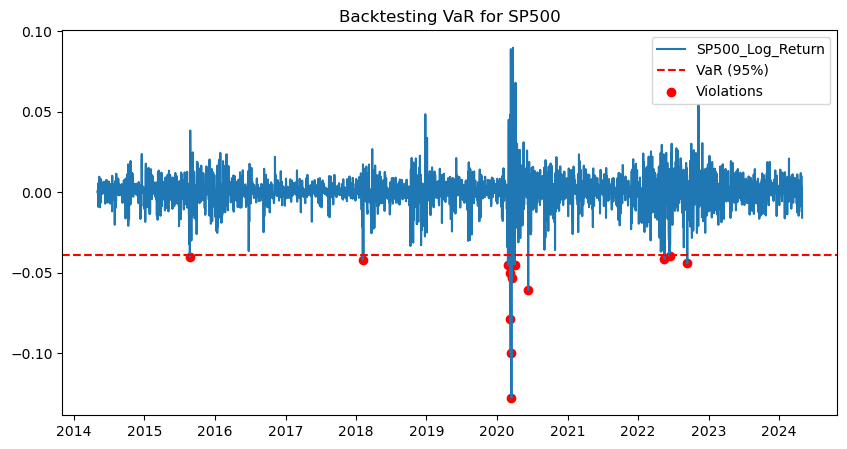

Number of violations for SP500: 14



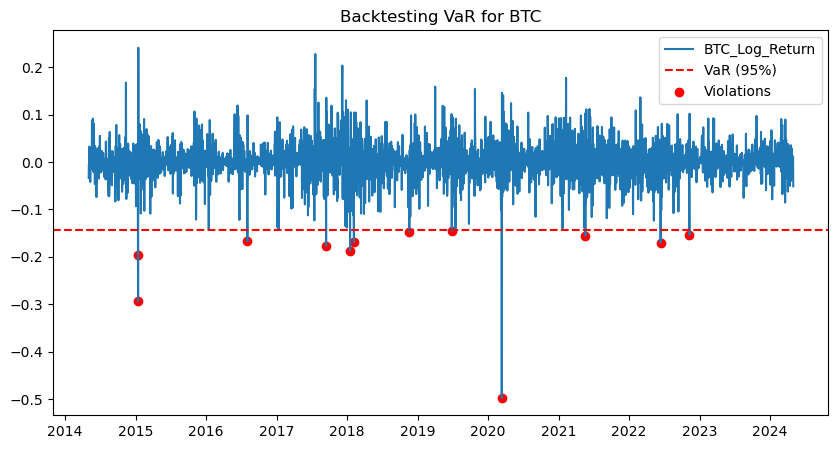

Number of violations for BTC: 12



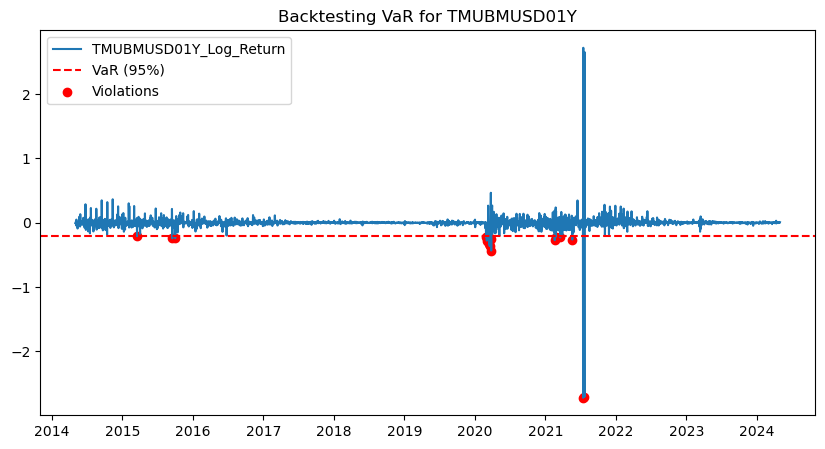

Number of violations for TMUBMUSD01Y: 18



In [50]:
def backtest_VaR(series, VaR):
    violations = series[series < VaR]
    return violations

def plot_backtest(df_assets, asset, VaR, violations):
    plt.figure(figsize=(10, 5))
    plt.plot(df_assets.index, df_assets[f'{asset}_Log_Return'], label=f'{asset}_Log_Return')
    plt.axhline(y=VaR, color='r', linestyle='--', label=f'VaR (95%)')
    plt.scatter(violations.index, violations, color='red', label='Violations')
    plt.title(f'Backtesting VaR for {asset}')
    plt.legend()
    plt.show()

for asset in assets:
    VaR = VaR_results[asset]
    violations = backtest_VaR(df_assets[f'{asset}_Log_Return'], VaR)
    plot_backtest(df_assets, asset, VaR, violations)
    print(f"Number of violations for {asset}: {len(violations)}\n")

# Historical Method

In [51]:
# Function to calculate VaR
def calculate_var(returns, days, confidence_level):
    sorted_returns = np.sort(returns)
    index = int(np.floor((1 - confidence_level) * len(sorted_returns) * days))
    var = sorted_returns[index]
    return var

# Calculate rolling 10-day returns for each asset
df_assets['SP500_Rolling_10'] = df_assets['SP500_Return'].rolling(window=10).sum()
df_assets['BTC_Rolling_10'] = df_assets['BTC_Return'].rolling(window=10).sum()
df_assets['TMUB_Rolling_10'] = df_assets['TMUBMUSD01Y_Return'].rolling(window=10).sum()

# Calculate 1-day and 10-day VaR for each asset using a 95% confidence level
confidence_level = 0.95
var_1day_sp500 = calculate_var(df_assets['SP500_Return'], 1, confidence_level)
var_10day_sp500 = calculate_var(df_assets['SP500_Rolling_10'].dropna(), 1, confidence_level)
var_1day_btc = calculate_var(df_assets['BTC_Return'], 1, confidence_level)
var_10day_btc = calculate_var(df_assets['BTC_Rolling_10'].dropna(), 1, confidence_level)
var_1day_tmub = calculate_var(df_assets['TMUBMUSD01Y_Return'], 1, confidence_level)
var_10day_tmub = calculate_var(df_assets['TMUB_Rolling_10'].dropna(), 1, confidence_level)

In [52]:
# Function to perform backtesting of VaR
def backtest_var(returns, var):
    exceedances = returns < var
    return exceedances.sum(), exceedances.sum() / len(returns) * 100
# Backtesting 1-day and 10-day VaR for each asset
backtest_1day_sp500 = backtest_var(df_assets['SP500_Return'], var_1day_sp500)
backtest_10day_sp500 = backtest_var(df_assets['SP500_Rolling_10'].dropna(), var_10day_sp500)
backtest_1day_btc = backtest_var(df_assets['BTC_Return'], var_1day_btc)
backtest_10day_btc = backtest_var(df_assets['BTC_Rolling_10'].dropna(), var_10day_btc)
backtest_1day_tmub = backtest_var(df_assets['TMUBMUSD01Y_Return'], var_1day_tmub)
backtest_10day_tmub = backtest_var(df_assets['TMUB_Rolling_10'].dropna(), var_10day_tmub)

In [53]:
# Print the numerical results
print("VaR and Backtesting Results:")
print(f"SP500 - 1-day VaR: {var_1day_sp500:.2%}, Exceedances: {backtest_1day_sp500}")
print(f"SP500 - 10-day VaR: {var_10day_sp500:.2%}, Exceedances: {backtest_10day_sp500}")
print(f"BTC - 1-day VaR: {var_1day_btc:.2%}, Exceedances: {backtest_1day_btc}")
print(f"BTC - 10-day VaR: {var_10day_btc:.2%}, Exceedances: {backtest_10day_btc}")
print(f"TMUB - 1-day VaR: {var_1day_tmub:.2%}, Exceedances: {backtest_1day_tmub}")
print(f"TMUB - 10-day VaR: {var_10day_tmub:.2%}, Exceedances: {backtest_10day_tmub}")

VaR and Backtesting Results:
SP500 - 1-day VaR: -1.72%, Exceedances: (181, 4.95618838992333)
SP500 - 10-day VaR: -7.26%, Exceedances: (182, 4.9958825144112)
BTC - 1-day VaR: -5.74%, Exceedances: (182, 4.983570646221248)
BTC - 10-day VaR: -15.78%, Exceedances: (182, 4.9958825144112)
TMUB - 1-day VaR: -6.84%, Exceedances: (181, 4.95618838992333)
TMUB - 10-day VaR: -25.19%, Exceedances: (182, 4.9958825144112)


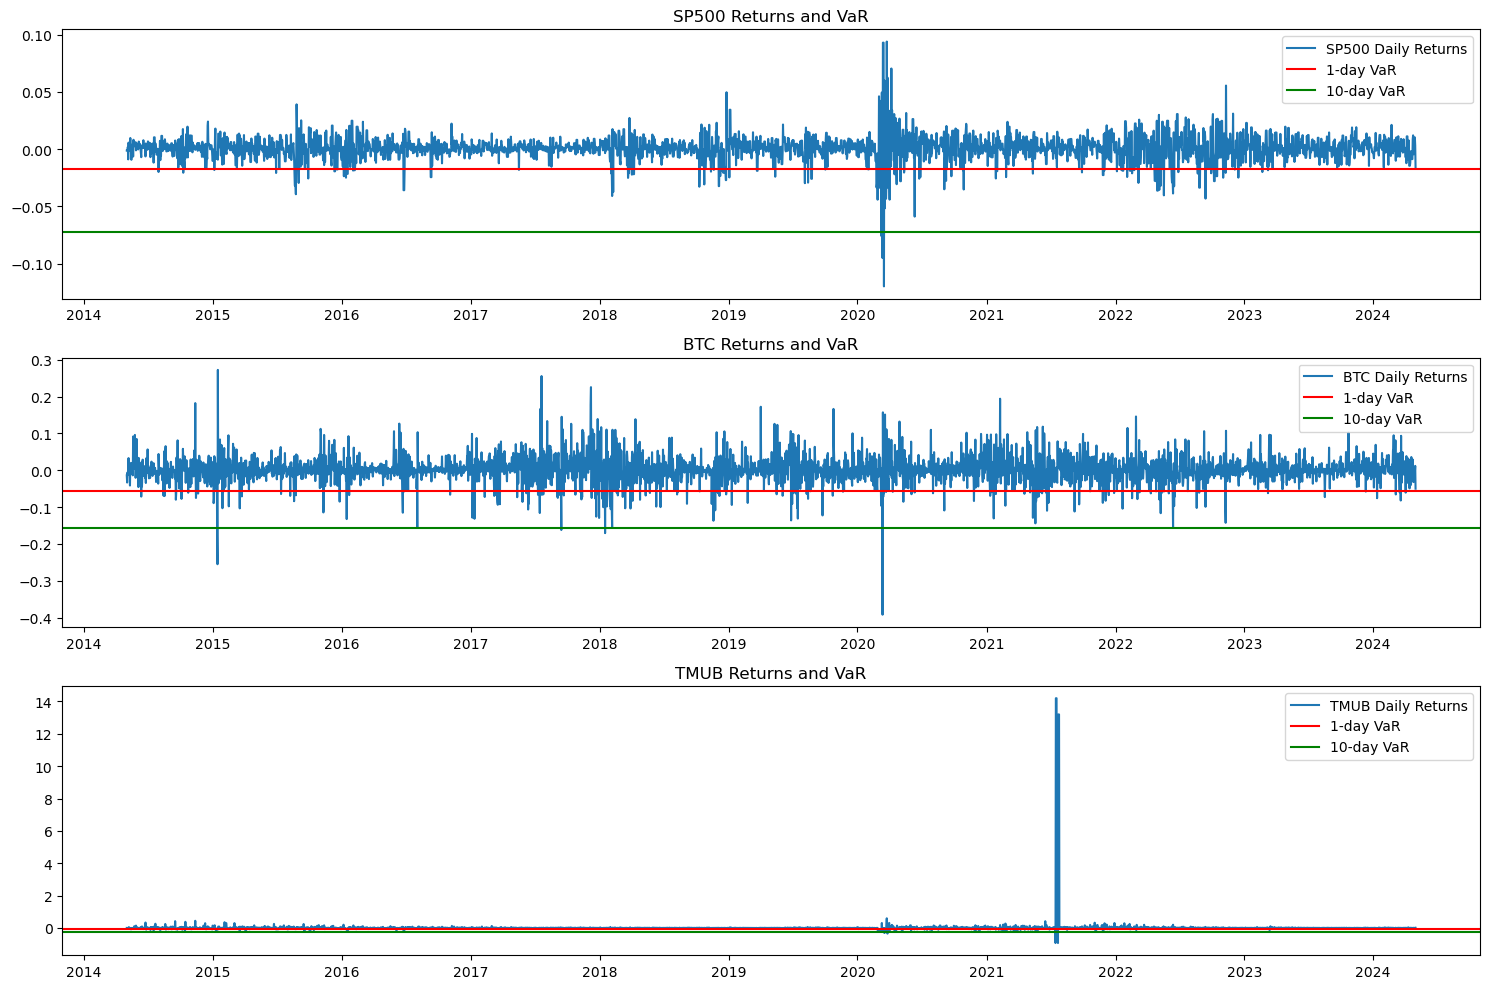

In [54]:
# Visualization
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df_assets['SP500_Return'], label='SP500 Daily Returns')
plt.axhline(y=var_1day_sp500, color='r', linestyle='-', label='1-day VaR')
plt.axhline(y=var_10day_sp500, color='g', linestyle='-', label='10-day VaR')
plt.title('SP500 Returns and VaR')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_assets['BTC_Return'], label='BTC Daily Returns')
plt.axhline(y=var_1day_btc, color='r', linestyle='-', label='1-day VaR')
plt.axhline(y=var_10day_btc, color='g', linestyle='-', label='10-day VaR')
plt.title('BTC Returns and VaR')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_assets['TMUBMUSD01Y_Return'], label='TMUB Daily Returns')
plt.axhline(y=var_1day_tmub, color='r', linestyle='-', label='1-day VaR')
plt.axhline(y=var_10day_tmub, color='g', linestyle='-', label='10-day VaR')
plt.title('TMUB Returns and VaR')
plt.legend()

plt.tight_layout()
plt.show()

## Conditional VAR

### 1. Conditional VAR for 1 day only

In [58]:
# ChatGPT used
def calculate_cvar(returns, confidence_level=0.95):
    var_threshold = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns <= var_threshold].mean()
    return cvar

df_assets = df_assets.dropna(subset=['SP500_Log_Return', 'BTC_Log_Return', 'TMUBMUSD01Y_Log_Return'])

# Calculate 1-day CVaR for each asset using log returns
cvar_1day_sp500_log = calculate_cvar(df_assets['SP500_Log_Return'], confidence_level=0.95)
cvar_1day_btc_log = calculate_cvar(df_assets['BTC_Log_Return'], confidence_level=0.95)
cvar_1day_tmub_log = calculate_cvar(df_assets['TMUBMUSD01Y_Log_Return'], confidence_level=0.95)

print("1-day 95% CVaR for SP500 (Log Returns): ", cvar_1day_sp500_log)
print("1-day 95% CVaR for BTC (Log Returns): ", cvar_1day_btc_log)
print("1-day 95% CVaR for TMUB (Log Returns): ", cvar_1day_tmub_log)

1-day 95% CVaR for SP500 (Log Returns):  -0.023787135514475526
1-day 95% CVaR for BTC (Log Returns):  -0.091149640845326
1-day 95% CVaR for TMUB (Log Returns):  -0.13812384979708195


SP500 CVaR: the average loss is approximately 2.67%.
BTC CVaR: the average loss is about 8.61%. 
TMUB CVaR: the average loss is about 13.26%.

### 2. Conditional VAR for 10 days.

In [59]:
# Calculate 10-day log returns, making sure to drop NaN values after the rolling sum
df_assets['SP500_Log_Return_10day'] = df_assets['SP500_Log_Return'].rolling(window=10).sum()
df_assets['BTC_Log_Return_10day'] = df_assets['BTC_Log_Return'].rolling(window=10).sum()
df_assets['TMUBMUSD01Y_Log_Return_10day'] = df_assets['TMUBMUSD01Y_Log_Return'].rolling(window=10).sum()

# Drop NaN values after calculating the rolling sums
df_assets = df_assets.dropna(subset=['SP500_Log_Return_10day', 'BTC_Log_Return_10day', 'TMUBMUSD01Y_Log_Return_10day'])

# Calculate CVaR (Conditional Value at Risk)
def calculate_cvar(returns, confidence_level=0.95):
    var_threshold = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns <= var_threshold].mean()
    return cvar

# Calculate 10-day CVaR for each asset using log returns
cvar_10day_sp500_log = calculate_cvar(df_assets['SP500_Log_Return_10day'], confidence_level=0.95)
cvar_10day_btc_log = calculate_cvar(df_assets['BTC_Log_Return_10day'], confidence_level=0.95)
cvar_10day_tmub_log = calculate_cvar(df_assets['TMUBMUSD01Y_Log_Return_10day'], confidence_level=0.95)

print("10-day 95% CVaR for SP500 (Log Returns): ", cvar_10day_sp500_log)
print("10-day 95% CVaR for BTC (Log Returns): ", cvar_10day_btc_log)
print("10-day 95% CVaR for TMUB (Log Returns): ", cvar_10day_tmub_log)


10-day 95% CVaR for SP500 (Log Returns):  -0.06944208282750157
10-day 95% CVaR for BTC (Log Returns):  -0.2597788254654866
10-day 95% CVaR for TMUB (Log Returns):  -0.35763898525320004


SP500 CVaR: loss is approximately 10.74%.
BTC CVaR: loss is about 23.49%.
TMUB CVaR: loss is about 51.31%.

### 3. Backtesting CVAR results

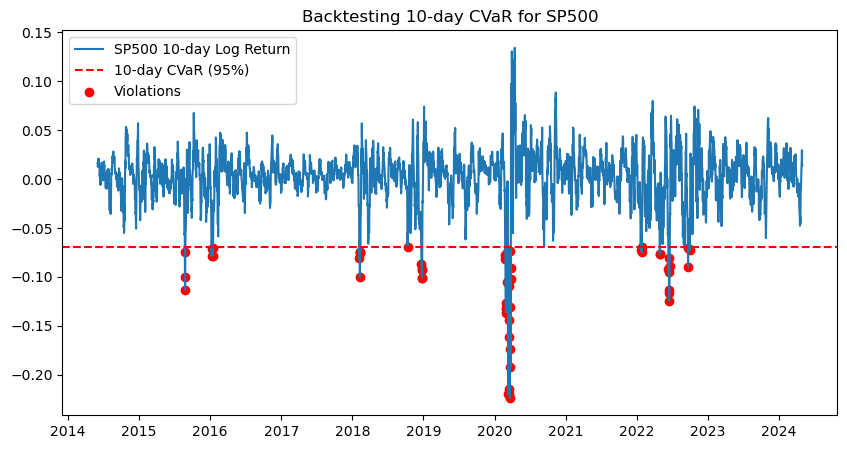

Number of violations for SP500: 57



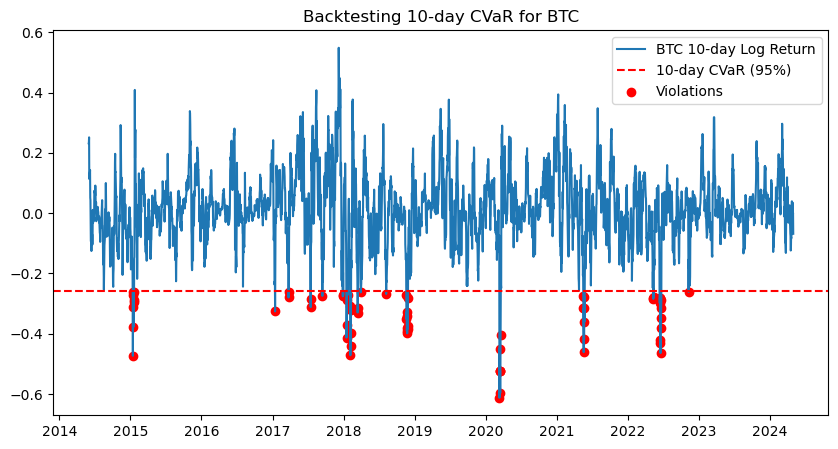

Number of violations for BTC: 67



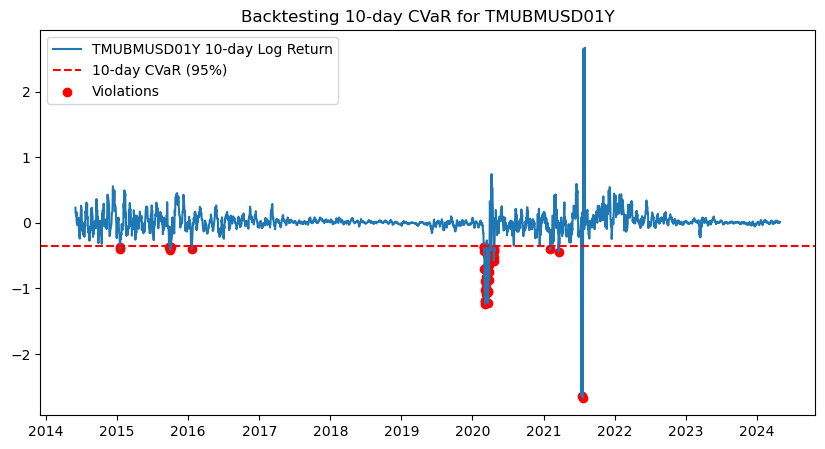

Number of violations for TMUBMUSD01Y: 46



In [62]:
#ChatGPT used

# Function to backtest CVaR
def backtest_CVaR(series, CVaR):
    violations = series[series < CVaR]
    return violations

# Function to plot backtest results
def plot_backtest(df_assets, asset, CVaR, violations):
    plt.figure(figsize=(10, 5))
    plt.plot(df_assets.index, df_assets[f'{asset}_Log_Return_10day'], label=f'{asset} 10-day Log Return')
    plt.axhline(y=CVaR, color='r', linestyle='--', label=f'10-day CVaR (95%)')
    plt.scatter(violations.index, violations, color='red', label='Violations')
    plt.title(f'Backtesting 10-day CVaR for {asset}')
    plt.legend()
    plt.show()

# 10-day CVaR results from log returns calculation
CVaR_log_results = {
    'SP500': cvar_10day_sp500_log,
    'BTC': cvar_10day_btc_log,
    'TMUBMUSD01Y': cvar_10day_tmub_log
}

# List of assets to backtest
assets = ['SP500', 'BTC', 'TMUBMUSD01Y']

# Backtest CVaR for each asset and plot the results
for asset in assets:
    CVaR = CVaR_log_results[asset]
    violations = backtest_CVaR(df_assets[f'{asset}_Log_Return_10day'], CVaR)
    plot_backtest(df_assets, asset, CVaR, violations)
    print(f"Number of violations for {asset}: {len(violations)}\n")
